# *Predicting the Condition of Water Pumps in Tanzania.*

Homepage: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

***
There are thousands of water pumps in the country of Tanzania, many of which are an integral part of their area's sustainability. However, many of these pumps are known to need maintenance (or not working entirely). 



**Final Project Submission**

* **Student name:** Claude Fried
* **Student pace:** Part-time
* **Scheduled project review date/time:** Oct 8, 2020
* **Instructor name:** James Irving
* **Blog post URL:** ---


# Objectives

- The goal is to use data on water pumps in Tanzania to predict the condition of the well.
- Using this information, we can make smart, data-driven decisions on how to allocate resources in order to maintain / fix pumps which are most in need.
- If successful, the predictions made by these models will be able to improve maintenance operations for these water pumps and significantly improve many people's quality of life.

## Success Criteria
From the competition website:
> **PRIMARY EVALUATION METRIC:**
Classification Rate = $\frac{1}{N}\sum_{i=0}^{N} (y_i = \hat{y}_i)$

> The metric used for this competition is the classification rate, which calculates the percentage of rows where the predicted class $\hat{y}$ in the submission matches the actual class, $y$ in the test set. The maximum is 1 and the minimum is 0. The goal is to maximize the classification rate.

**The current top score is 0.8294** *(23SEP2020)*
- This is the same as the *accuracy score.*
- The target variable is **`status_group`**. This is divided into three categories: `['functional', 'functional needs repair', 'non functional']`.
- It is an unbalanced dataset (there are far more `functional` water pumps).
```
functional                 54 %
non functional             38 %
functional needs repair     7 %
```
- A baseline model (which always guesses a pump to be `functional`) will have an accuracy score of 0.54. 
- **A successful model will have a strong accuracy - the ability to correctly identify as many data points as possible.**

In [1]:
from support_functions import *

pd.set_option('display.max_columns', None)
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

np.random.seed(RANDOM_STATE)

C:\Users\claud\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# The Data

The data has been collected from Taarifa (http://taarifa.org/) and the Tanzanian Ministry of Water. 

From Taarifa:
> *Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. Think of it as a bug tracker for the real world which helps to engage citizens with their local government. We are currently working on an Innovation Project in Tanzania, with various partners.*

In [2]:
[f for f in os.listdir() if f.endswith('.csv')]

['SubmissionFormat.csv',
 'test_values.csv',
 'train_labels.csv',
 'train_values.csv']

## Load

In [3]:
raw_train_values = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_values = pd.read_csv('test_values.csv')

ALL_RAW = [
    ('Training Independent Variables', raw_train_values),
    ('Training Target Variable', raw_train_labels),
    ('Testing Independent Variables', raw_test_values)
]

# Successful load-in.
for label, df in ALL_RAW:
    print(headerize(label))
    display(df.head())
    print(df.shape)
    print()

********************************************************************************
*                        Training Independent Variables                        *
********************************************************************************


id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

(59400, 40)

********************************************************************************
*                           Training Target Variable                           *
********************************************************************************


id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

(59400, 2)

********************************************************************************
*                        Testing Independent Variables                         *
********************************************************************************


id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

                     basin  subvillage   region  region_code  district_code  \
0                 Internal      Magoma  Manyara           21              3   
1                  Pangani     Kimnyak   Arusha            2              2   
2                 Internal       Msatu  Singida           13              2   
3  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43   
4  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3   

             lga          ward  population public_meeting  \
0          Mbulu        Bashay         321           True   
1   Arusha Rural      Kimnyaki         300           True   
2  Singida Rural          Puma         500           True   
3         Liwale       Mkutano         250            NaN   
4         Mbinga  Mbinga Urban          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

   construction_year extraction_type extraction_type_group  \
0               2012           other                 other   
1               2000         gravity               gravity   
2               2010           other                 other   
3               1987           other                 other   
4               2000         gravity               gravity   

  extraction_type_class   management management_group      payment  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group  pay monthly   

  payment_type water_quality quality_group      quantity quantity_group  \
0    never pay          soft          good      seasonal       seasonal   
1    never pay          soft          good  insufficient   insufficient   
2    never pay          soft          good  insufficient   insufficient   
3      unknown          soft          good           dry            dry   
4      monthly          soft          good        enough         enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other      

(14850, 40)



In [4]:
full_train = pd.merge(raw_train_labels, raw_train_values, on='id')
full_train.shape

(59400, 41)

In [5]:
full_train.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

- There are only a handful of numerical columns.
- It looks like there are some geographical columns in longitude / latitude / gps_height.
- There are two code categories which are probably pre-encoded categoricals.

In [6]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [7]:
full_train.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

- There are a handful of continuous variables, but this dataset is made up mostly of categorical features.
- There are many missing values all of which belong to categorical features. We will find out if these are missing at random and will impute them later.
 - Most likely we will impute with a `missing` label.

In [8]:
# The competition data.
# Unlabeled data.
unlabeled_y = raw_test_values
unlabeled_y.shape

(14850, 40)


### `train_test_split()`
Even though there is a literal "*test data*" provided for the competition, it is unlabeled and can not be used to verify models.

We will still need a test-train split.

In [9]:
X = full_train.drop('status_group', axis=1).copy()
y = full_train['status_group'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 40), (14850, 40), (44550,), (14850,))

# EDA

***
### Column Descriptions

*From https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/*

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

***

Most of this is self-explanatory, but I can see there are many redundant columns (eg: source, source_type, sorce_class). Going though, we'll try to make intelligent choices when it comes to these categories.

In [10]:
# Set up lists to append with notes.
TO_DO_NOTES = []
COLS_TO_DROP = []

## `y_train`

### status_group

********************************************************************************
*                            status_group Analysis                             *
********************************************************************************


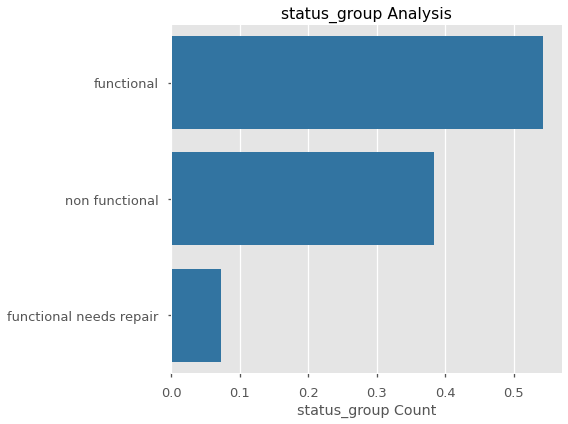


status_group - Value Counts:
----------------------------


functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64


status_group - Unique Values
----------------------------
3 unique values (out of 44550).

status_group - NaN:
-------------------
0.0%
(0/44550)


In [11]:
preliminary_eda(y_train, normalize=True)

> **`status_group`: This is the target variable. There are three categories which will need to be encoded. There is also a class imbalance issue which will need to be addressed. There are clearly many more `functional` and `non functional` than `functional needs repair`.**

## `X_train`

### id

********************************************************************************
*                                 id Analysis                                  *
********************************************************************************


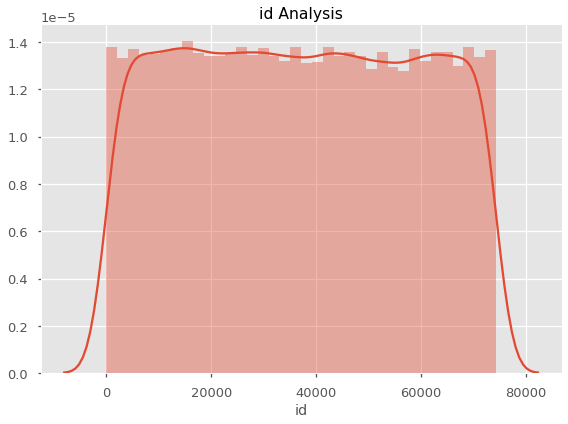


id - Value Counts:
------------------


67583    1
19907    1
1839     1
3531     1
67018    1
73161    1
71112    1
28103    1
32197    1
30148    1
Name: id, dtype: int64


id - Unique Values
------------------
44550 unique values (out of 44550).

id - NaN:
---------
0.0%
(0/44550)


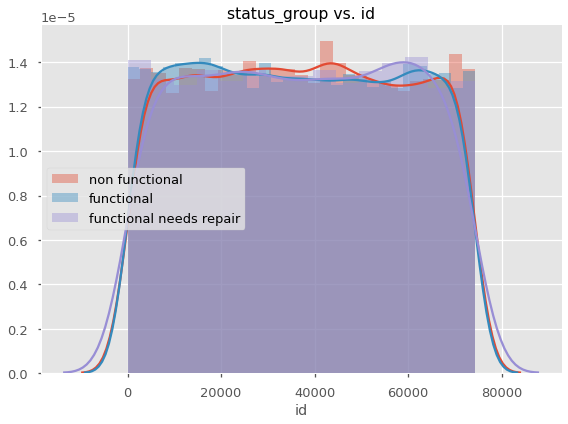

In [12]:
preliminary_eda(X_train, 'id', mean_median=False,
                interact_with_series=y_train)

> **`id`: Clearly a unique identifier. One value for each row in the dataset. This column will not be used for its predictive value.**

In [13]:
COLS_TO_DROP.append('id')

### amount_tsh

********************************************************************************
*                             amount_tsh Analysis                              *
********************************************************************************
Total static head (amount water available to waterpoint)
--------------------------------------------------------


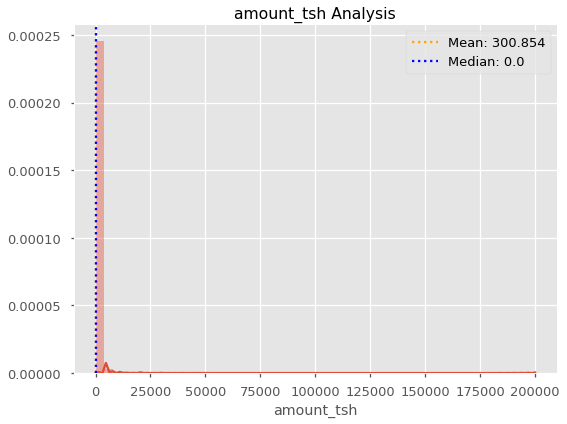


amount_tsh - Value Counts:
--------------------------


0.0       31276
500.0      2291
50.0       1879
1000.0     1103
20.0       1100
200.0       906
10.0        622
100.0       608
30.0        561
2000.0      526
Name: amount_tsh, dtype: int64


amount_tsh - Unique Values
--------------------------
91 unique values (out of 44550).

amount_tsh - NaN:
-----------------
0.0%
(0/44550)


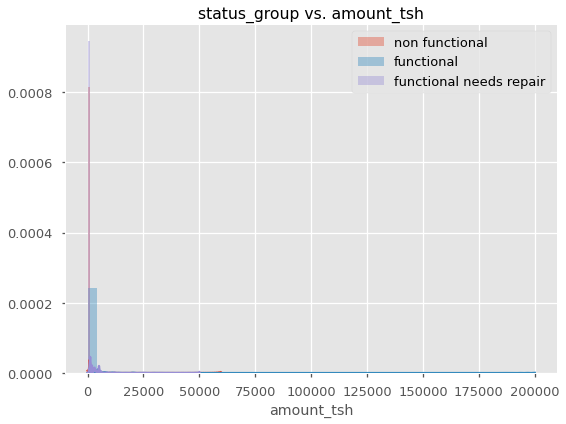

In [14]:
preliminary_eda(X_train, 'amount_tsh', 
                interact_with_series=y_train)

> **`amount_tsh`: Out of 44,550 values, 31,276 wells have 0-*tsh*.**

> It would be a good idea to engineer a new categorical column of whether the `tsh` is greater than 0.

In [15]:
TO_DO_NOTES.append('Make categorical column - "amount_tsh" > 0.')

### date_recorded

****************************************************************
*                    date_recorded Analysis                    *
****************************************************************
The date the row was entered
----------------------------


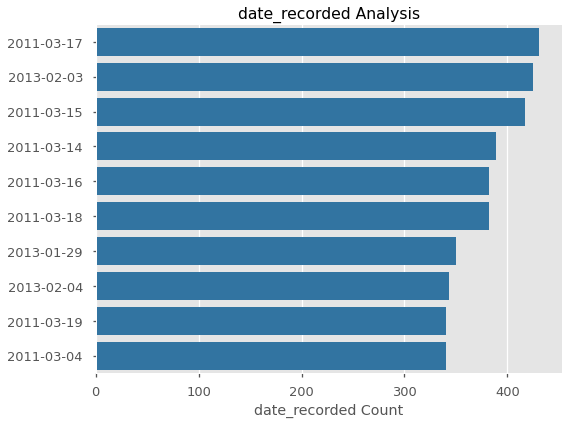


date_recorded - Value Counts:
-----------------------------


2011-03-17    431
2013-02-03    425
2011-03-15    417
2011-03-14    389
2011-03-16    382
2011-03-18    382
2013-01-29    350
2013-02-04    343
2011-03-19    340
2011-03-04    340
Name: date_recorded, dtype: int64


date_recorded - Unique Values
-----------------------------
349 unique values (out of 44550).

date_recorded - NaN:
--------------------
0.0%
(0/44550)


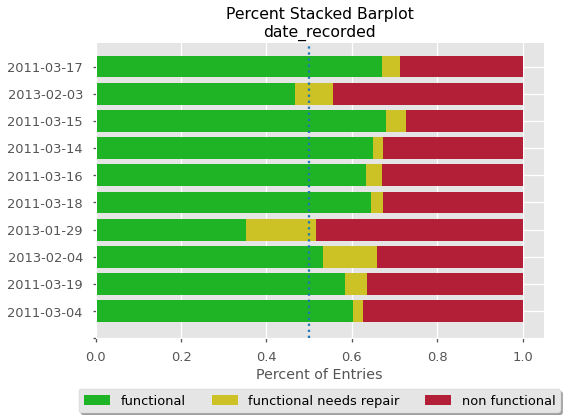

In [16]:
preliminary_eda(X_train, 'date_recorded', 
                interact_with_series=y_train)

> **`date_recorded`: This does not indicate the date of installation, only of row entry. It will therefore be dropped.**

In [17]:
COLS_TO_DROP.append('date_recorded')

### funder

*********************************************************
*                    funder Analysis                    *
*********************************************************
Who funded the well
-------------------


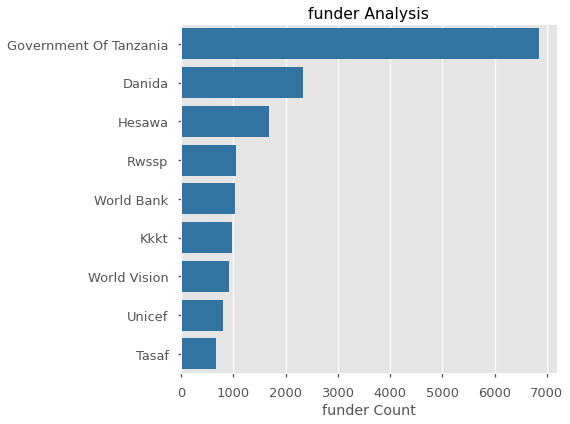


funder - Value Counts:
----------------------


Government Of Tanzania    6844
NaN                       2730
Danida                    2337
Hesawa                    1676
Rwssp                     1049
World Bank                1033
Kkkt                       980
World Vision               922
Unicef                     794
Tasaf                      664
Name: funder, dtype: int64


funder - Unique Values
----------------------
1665 unique values (out of 44550).

funder - NaN:
-------------
6.13%
(2730/44550)


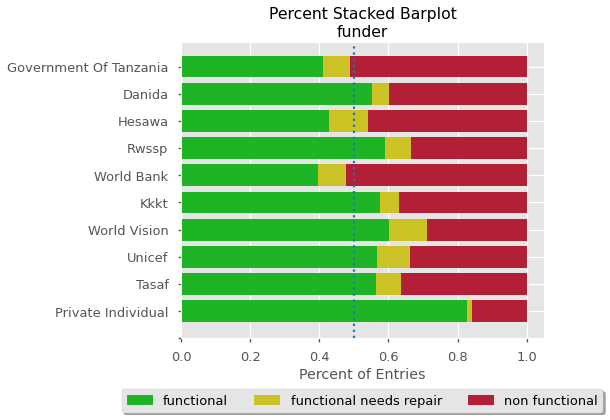

In [18]:
preliminary_eda(X_train, 'funder', 
                interact_with_series=y_train)

> **`funder`: Only 6% of values are missing, but the second-most-common entry is NaN. This value should be imputed as 'missing'.**
> - There are way too many categories to one-hot-encode this column in the final models, so I'll try to choose the most predictive values from this column and slice them out.

In [19]:
TO_DO_NOTES.append('Impute `funder` col for NaN: `missing`')

### gps_height

*************************************************************
*                    gps_height Analysis                    *
*************************************************************
Altitude of the well
--------------------


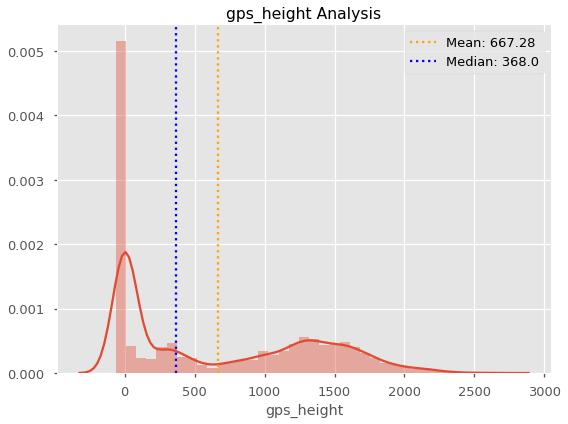


gps_height - Value Counts:
--------------------------


 0       15392
-15         47
-20         41
-16         41
-13         40
 1290       39
 1359       39
 1295       37
 1269       36
-19         36
Name: gps_height, dtype: int64


gps_height - Unique Values
--------------------------
2388 unique values (out of 44550).

gps_height - NaN:
-----------------
0.0%
(0/44550)


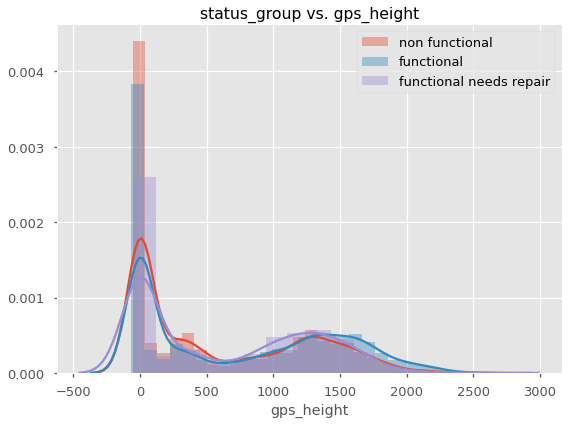

In [20]:
preliminary_eda(X_train, 'gps_height', 
                interact_with_series=y_train)

> **The distribution is interesting with gps_height. ~30% of the values are 0. There are then two humps - one centered near 300 and one centered around 1300.**

In [21]:
TO_DO_NOTES.append('Engineer `gps_height` into three binned values.')

### installer

************************************************************
*                    installer Analysis                    *
************************************************************
Organization that installed the well
------------------------------------


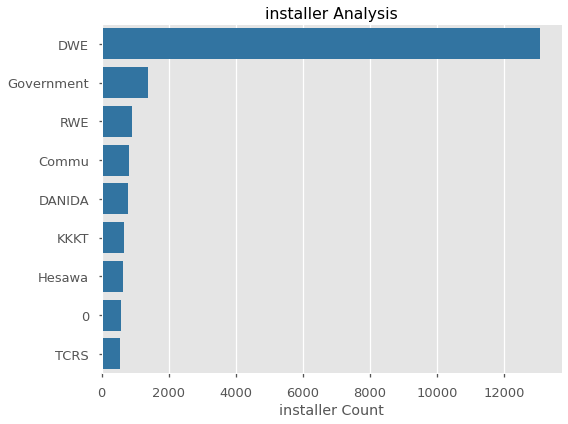


installer - Value Counts:
-------------------------


DWE           13068
NaN            2745
Government     1385
RWE             896
Commu           805
DANIDA          791
KKKT            682
Hesawa          626
0               579
TCRS            540
Name: installer, dtype: int64


installer - Unique Values
-------------------------
1862 unique values (out of 44550).

installer - NaN:
----------------
6.16%
(2745/44550)


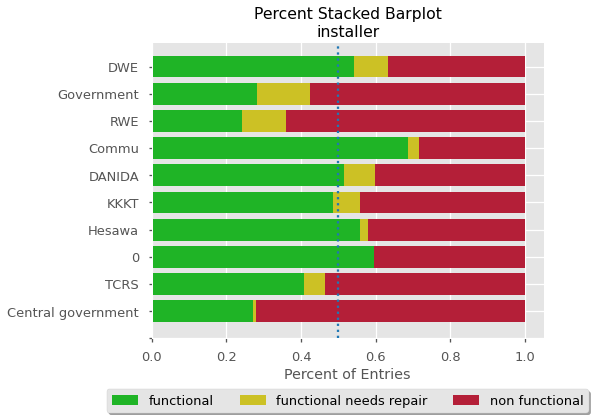

In [22]:
preliminary_eda(X_train, 'installer', 
                interact_with_series=y_train)

> **There are way too many categories to one-hot-encode, so it might be smart to simply make a boolean category of whether or not the installer was 'DWE'.**

In [23]:
COLS_TO_DROP.append('installer')
TO_DO_NOTES.append('Engineer column: `installer` == `DWE`.')

### longitude

************************************************************
*                    longitude Analysis                    *
************************************************************
GPS coordinate
--------------


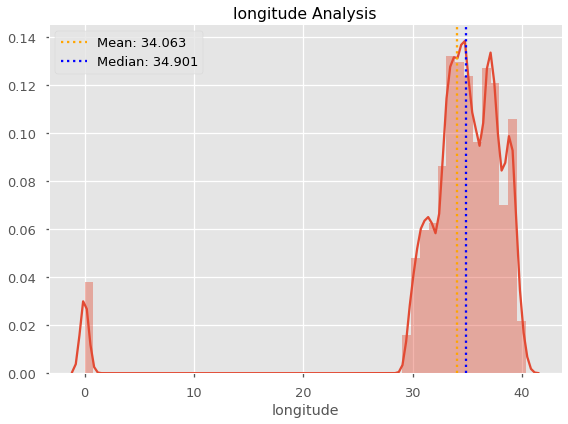


longitude - Value Counts:
-------------------------


0.000000     1367
37.236326       2
37.328905       2
37.374017       2
39.098514       2
32.956523       2
39.096499       2
31.619530       2
39.091380       2
37.297680       2
Name: longitude, dtype: int64


longitude - Unique Values
-------------------------
43139 unique values (out of 44550).

longitude - NaN:
----------------
0.0%
(0/44550)


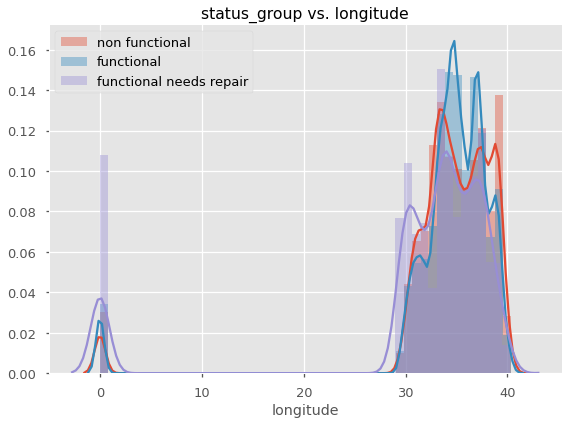

In [24]:
preliminary_eda(X_train, 'longitude', 
                interact_with_series=y_train)

> **There are missing values here represented by 0.0.**

### latitude

***********************************************************
*                    latitude Analysis                    *
***********************************************************
GPS coordinate
--------------


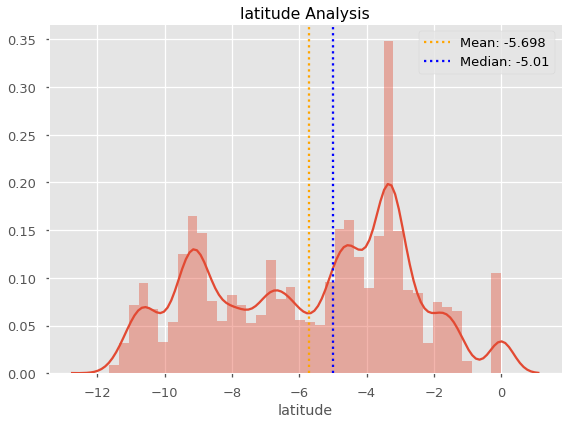


latitude - Value Counts:
------------------------


-2.000000e-08    1367
-7.093914e+00       2
-7.078081e+00       2
-6.962475e+00       2
-6.990147e+00       2
-3.342432e+00       2
-6.978322e+00       2
-6.983183e+00       2
-6.980220e+00       2
-6.980216e+00       2
Name: latitude, dtype: int64


latitude - Unique Values
------------------------
43138 unique values (out of 44550).

latitude - NaN:
---------------
0.0%
(0/44550)


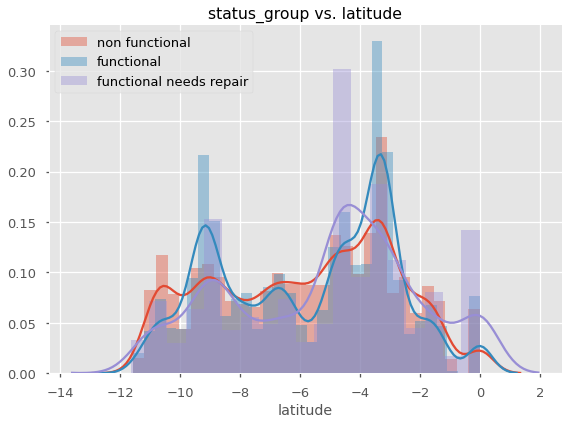

In [25]:
preliminary_eda(X_train, 'latitude', 
                interact_with_series=y_train)

> **There may be a similar situation to `longitude` (where 0.0=NaN), but since the 0.0 values are within a reasonable deviation, I will assume these are true values.**

### wpt_name

***********************************************************
*                    wpt_name Analysis                    *
***********************************************************
Name of the waterpoint if there is one
--------------------------------------


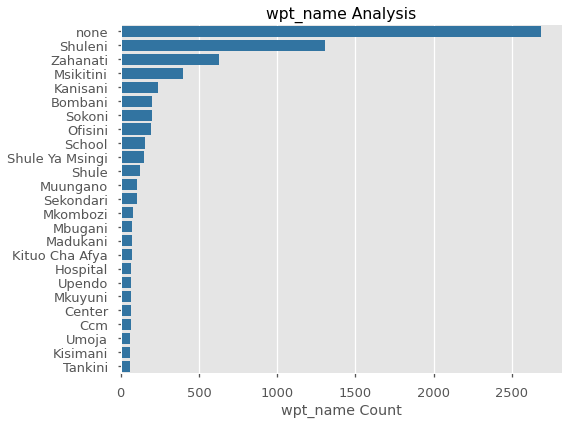


wpt_name - Value Counts:
------------------------


none               2684
Shuleni            1308
Zahanati            627
Msikitini           397
Kanisani            241
Bombani             198
Sokoni              198
Ofisini             194
School              158
Shule Ya Msingi     146
Shule               122
Muungano            104
Sekondari           103
Mkombozi             79
Mbugani              74
Madukani             72
Kituo Cha Afya       72
Hospital             69
Upendo               69
Mkuyuni              68
Center               64
Ccm                  63
Umoja                61
Kisimani             58
Tankini              58
Name: wpt_name, dtype: int64


wpt_name - Unique Values
------------------------
28978 unique values (out of 44550).

wpt_name - NaN:
---------------
0.0%
(0/44550)


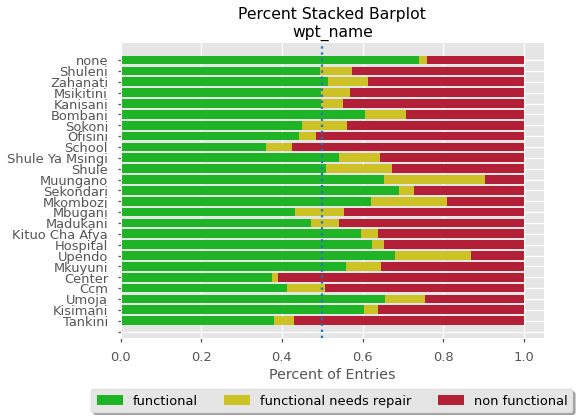

In [26]:
preliminary_eda(X_train, 'wpt_name', n_top_features=25, 
                interact_with_series=y_train)

> **There *could* be some indicators within the waterpoint name. If there is a hint based on location (and therefore name of waterpoint), there should be the same information embedded in long/lat.**

In [27]:
COLS_TO_DROP.append('wpt_name')

### num_private

**************************************************************
*                    num_private Analysis                    *
**************************************************************




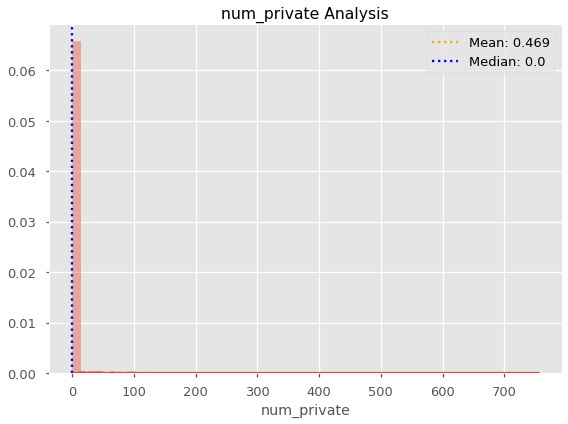


num_private - Value Counts:
---------------------------


0     43960
6        58
1        56
8        37
5        36
32       29
15       28
93       25
39       25
45       24
Name: num_private, dtype: int64


num_private - Unique Values
---------------------------
60 unique values (out of 44550).

num_private - NaN:
------------------
0.0%
(0/44550)


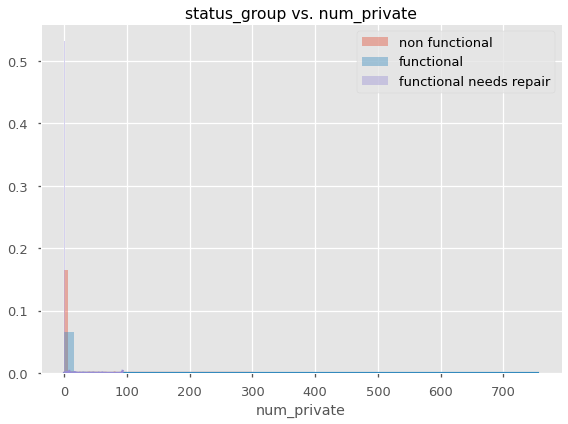

In [28]:
preliminary_eda(X_train, 'num_private', 
                interact_with_series=y_train)

> **While there is no description to what this column is, there does look to be some correlation to the target with these outliers. I will therefore keep the category as it is.**

### basin

********************************************************
*                    basin Analysis                    *
********************************************************
Geographic water basin
----------------------


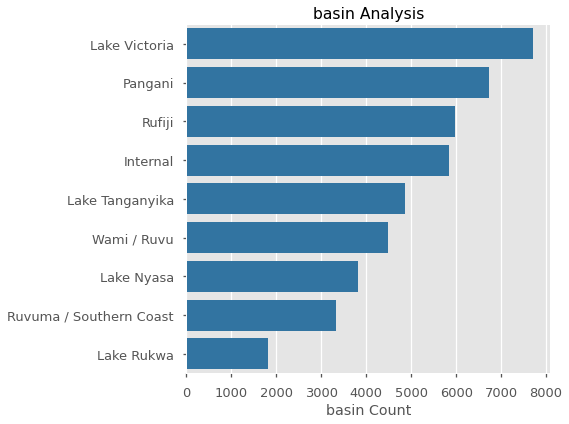


basin - Value Counts:
---------------------


Lake Victoria              7709
Pangani                    6722
Rufiji                     5968
Internal                   5847
Lake Tanganyika            4852
Wami / Ruvu                4481
Lake Nyasa                 3813
Ruvuma / Southern Coast    3335
Lake Rukwa                 1823
Name: basin, dtype: int64


basin - Unique Values
---------------------
9 unique values (out of 44550).

basin - NaN:
------------
0.0%
(0/44550)


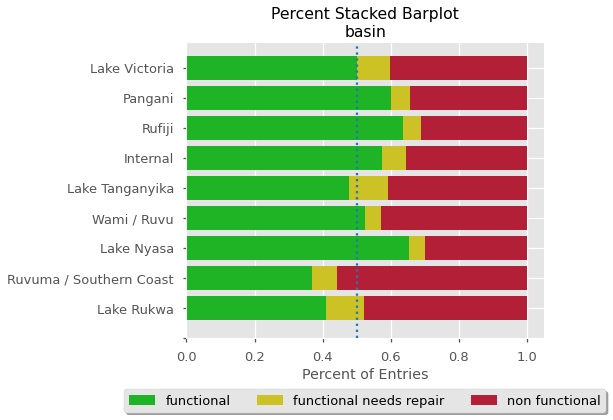

In [29]:
preliminary_eda(X_train, 'basin', 
                interact_with_series=y_train)

> **This seems like a good column which could have a good amount of predictive power.**

### subvillage

*************************************************************
*                    subvillage Analysis                    *
*************************************************************
Geographic location
-------------------


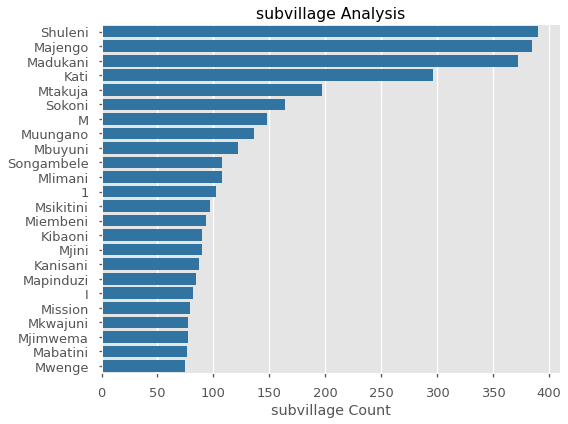


subvillage - Value Counts:
--------------------------


Shuleni       390
Majengo       385
Madukani      372
Kati          296
NaN           274
Mtakuja       197
Sokoni        164
M             148
Muungano      136
Mbuyuni       122
Songambele    108
Mlimani       108
1             102
Msikitini      97
Miembeni       93
Kibaoni        90
Mjini          90
Kanisani       87
Mapinduzi      84
I              82
Mission        79
Mkwajuni       77
Mjimwema       77
Mabatini       76
Mwenge         75
Name: subvillage, dtype: int64


subvillage - Unique Values
--------------------------
16621 unique values (out of 44550).

subvillage - NaN:
-----------------
0.62%
(274/44550)


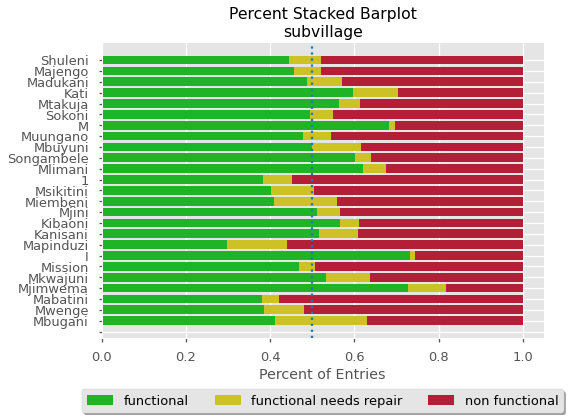

In [30]:
preliminary_eda(X_train, 'subvillage', n_top_features=25, 
                interact_with_series=y_train)

> **This column will need some work.**
 - The missing values need to be imputed.
 - There are way too many categories to one-hot-encode. More research might be needed to consolidate this column.
 - There are some strange names (`['M', '1', 'I']` for example)
 
**This column may be dropped.**

### region

*********************************************************
*                    region Analysis                    *
*********************************************************
Geographic location
-------------------


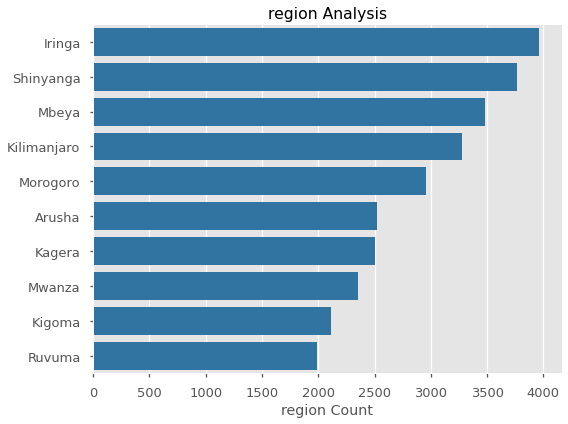


region - Value Counts:
----------------------


Iringa         3964
Shinyanga      3767
Mbeya          3480
Kilimanjaro    3276
Morogoro       2960
Arusha         2523
Kagera         2507
Mwanza         2351
Kigoma         2113
Ruvuma         1988
Name: region, dtype: int64


region - Unique Values
----------------------
21 unique values (out of 44550).

region - NaN:
-------------
0.0%
(0/44550)


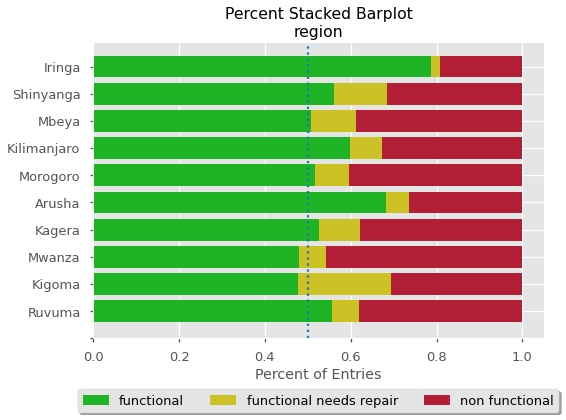

In [31]:
preliminary_eda(X_train, 'region', 
                interact_with_series=y_train)

> **This seems much better than (and somewhat similar to) `subvillage`.**

### region_code

**************************************************************
*                    region_code Analysis                    *
**************************************************************
Geographic location (coded)
---------------------------


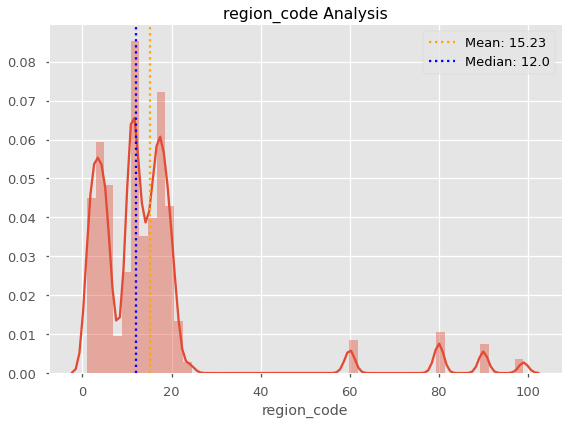


region_code - Value Counts:
---------------------------


11    3969
17    3789
12    3480
3     3276
5     2988
18    2515
19    2309
2     2275
16    2113
10    1988
Name: region_code, dtype: int64


region_code - Unique Values
---------------------------
27 unique values (out of 44550).

region_code - NaN:
------------------
0.0%
(0/44550)


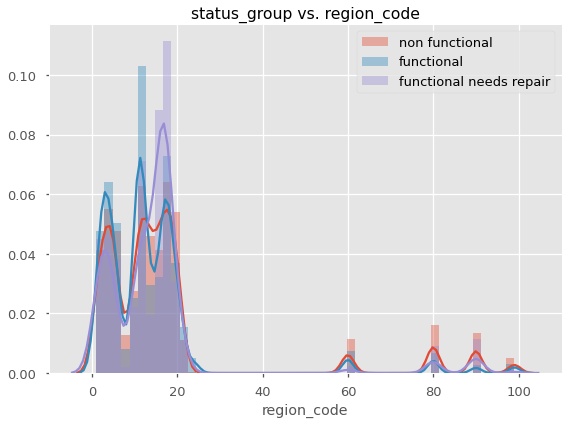

In [32]:
preliminary_eda(X_train, 'region_code', 
                interact_with_series=y_train)

> **Strangely, there are more region codes than regions (21 region, 27 region_code)**
 - This column should be categorical instead of numerical.

In [33]:
# Are the 'outlier' region_codes missing vales maybe?
X_train[X_train['region_code'] > 40]['region_code'].unique()

array([60, 99, 80, 90], dtype=int64)

In [34]:
TO_DO_NOTES.append('Transform region_code to categorical.')

### district_code

****************************************************************
*                    district_code Analysis                    *
****************************************************************
Geographic location (coded)
---------------------------


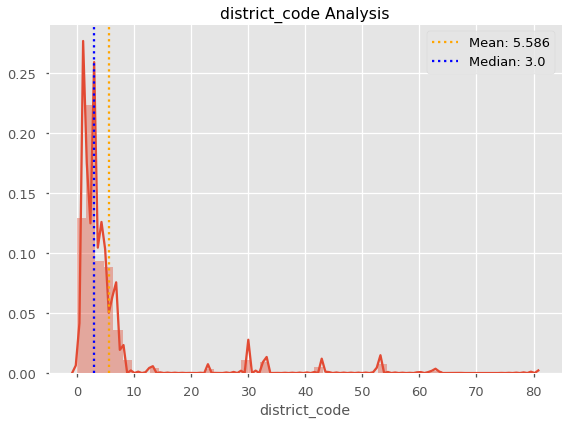


district_code - Value Counts:
-----------------------------


1     9176
2     8448
3     7496
4     6678
5     3281
6     3051
7     2531
8      775
30     760
33     638
Name: district_code, dtype: int64


district_code - Unique Values
-----------------------------
20 unique values (out of 44550).

district_code - NaN:
--------------------
0.0%
(0/44550)


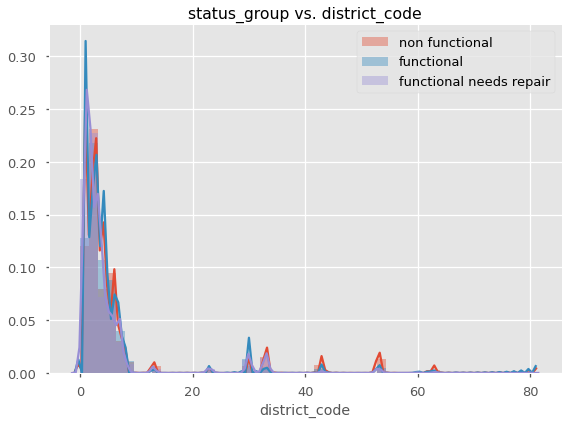

In [35]:
preliminary_eda(X_train, 'district_code', 
                interact_with_series=y_train)

> **This column should also be categorical instead of numerical.**

In [36]:
TO_DO_NOTES.append('Transform district_code to categorical.')

### lga

******************************************************
*                    lga Analysis                    *
******************************************************
Geographic location
-------------------


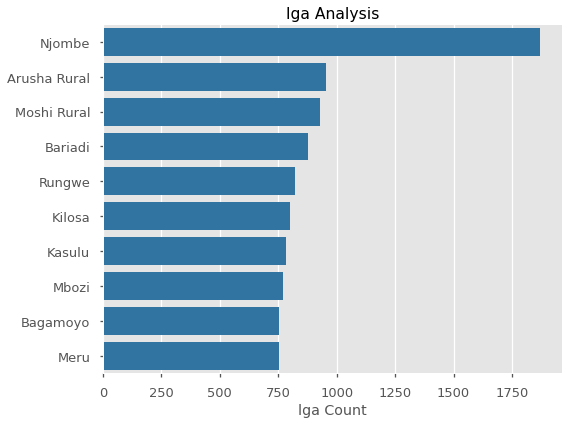


lga - Value Counts:
-------------------


Njombe          1869
Arusha Rural     956
Moshi Rural      928
Bariadi          878
Rungwe           823
Kilosa           799
Kasulu           784
Mbozi            770
Bagamoyo         755
Meru             753
Name: lga, dtype: int64


lga - Unique Values
-------------------
124 unique values (out of 44550).

lga - NaN:
----------
0.0%
(0/44550)


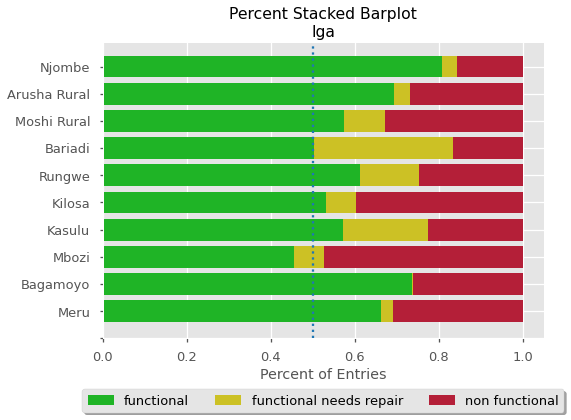

In [37]:
preliminary_eda(X_train, 'lga', 
                interact_with_series=y_train)

> **This is another indicator of geographic location.**

### ward

*******************************************************
*                    ward Analysis                    *
*******************************************************
Geographic location
-------------------


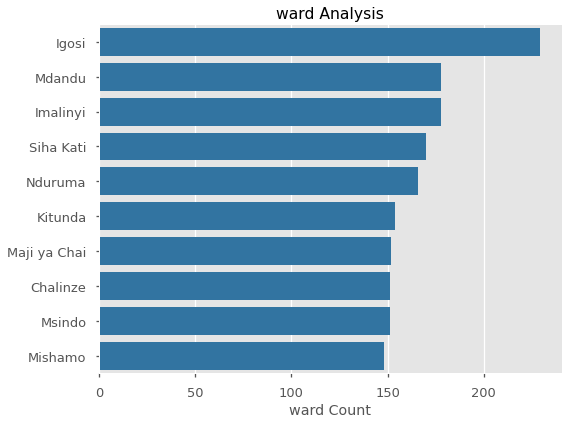


ward - Value Counts:
--------------------


Igosi           229
Mdandu          178
Imalinyi        178
Siha Kati       170
Nduruma         166
Kitunda         154
Maji ya Chai    152
Chalinze        151
Msindo          151
Mishamo         148
Name: ward, dtype: int64


ward - Unique Values
--------------------
2077 unique values (out of 44550).

ward - NaN:
-----------
0.0%
(0/44550)


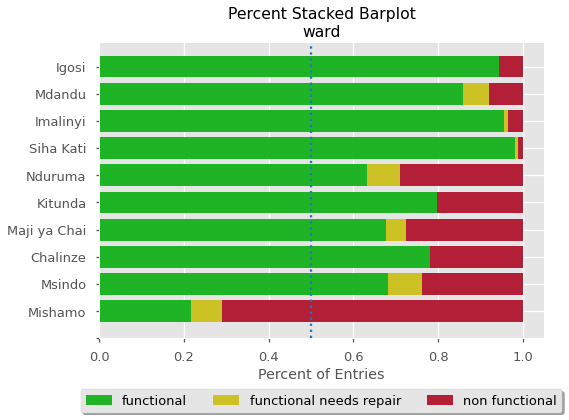

In [38]:
preliminary_eda(X_train, 'ward', 
                interact_with_series=y_train)

> **Yet another geographical category.**

### population

*************************************************************
*                    population Analysis                    *
*************************************************************
Population around the well
--------------------------


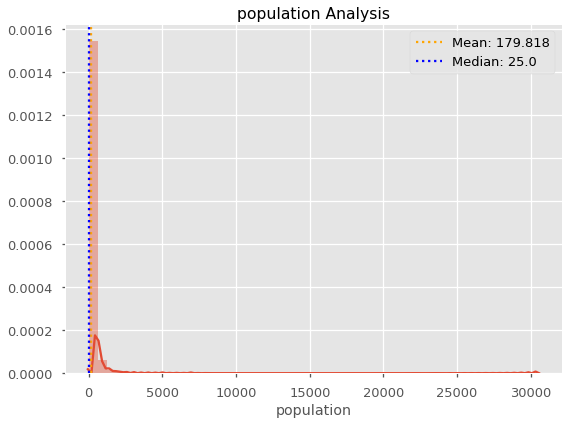


population - Value Counts:
--------------------------


0      16094
1       5297
150     1448
200     1433
250     1259
300     1092
100      878
50       852
500      770
350      754
Name: population, dtype: int64


population - Unique Values
--------------------------
973 unique values (out of 44550).

population - NaN:
-----------------
0.0%
(0/44550)


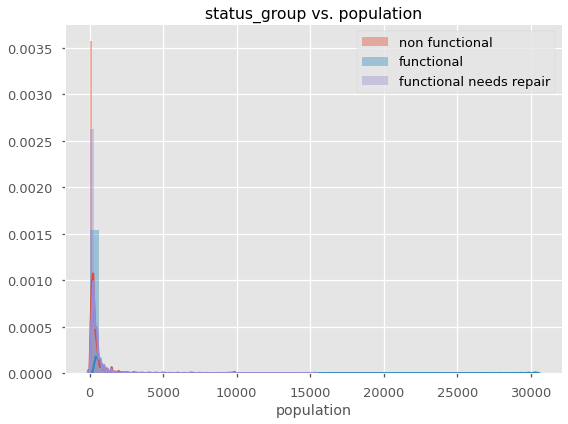

In [39]:
preliminary_eda(X_train, 'population', 
                interact_with_series=y_train)

> **Population 0 probably means the well is somewhat remote. I'll keep this column as it is.**

### public_meeting

*****************************************************************
*                    public_meeting Analysis                    *
*****************************************************************
True/False
----------


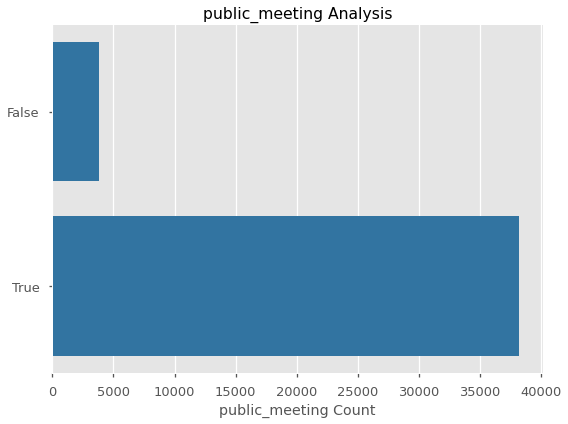


public_meeting - Value Counts:
------------------------------


True     38243
False     3796
NaN       2511
Name: public_meeting, dtype: int64


public_meeting - Unique Values
------------------------------
3 unique values (out of 44550).

public_meeting - NaN:
---------------------
5.64%
(2511/44550)


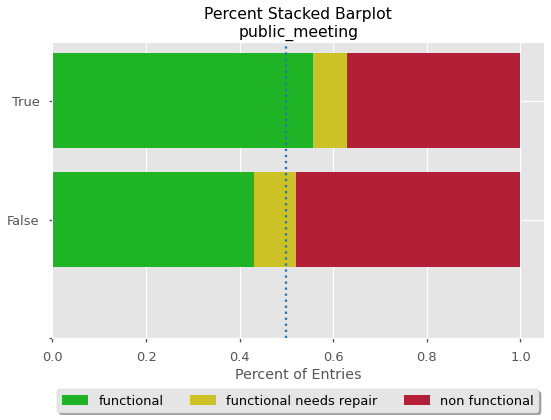

In [40]:
preliminary_eda(X_train, 'public_meeting', 
                interact_with_series=y_train)

> **By far more True than False. Also many missing values will be imputed.**

In [41]:
TO_DO_NOTES.append('Impute `public_meeting` NaN values with `missing`.')

### recorded_by

**************************************************************
*                    recorded_by Analysis                    *
**************************************************************
Group entering this row of data
-------------------------------


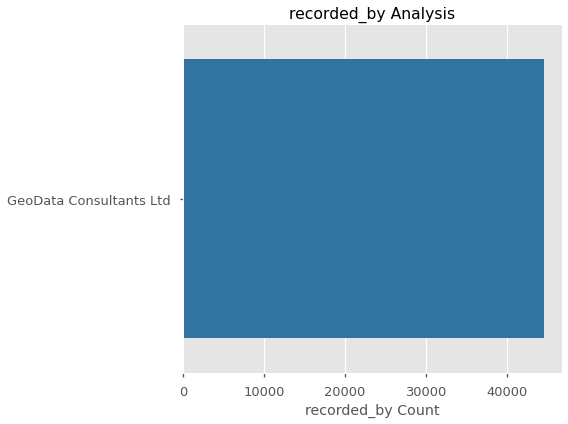


recorded_by - Value Counts:
---------------------------


GeoData Consultants Ltd    44550
Name: recorded_by, dtype: int64


recorded_by - Unique Values
---------------------------
1 unique values (out of 44550).

recorded_by - NaN:
------------------
0.0%
(0/44550)


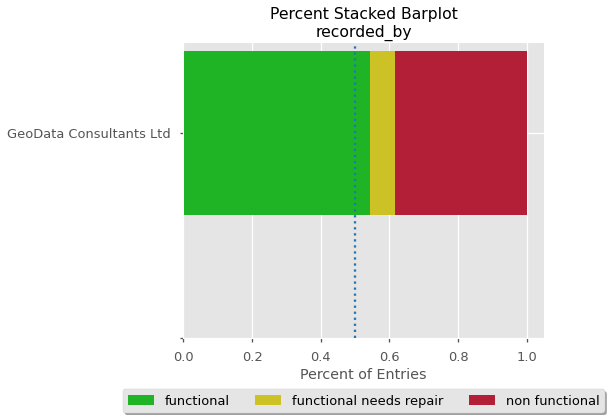

In [42]:
preliminary_eda(X_train, 'recorded_by', 
                interact_with_series=y_train)

> **A constant column which will be dropped.**

In [43]:
COLS_TO_DROP.append('recorded_by')

### scheme_management

********************************************************************
*                    scheme_management Analysis                    *
********************************************************************
Who operates the waterpoint
---------------------------


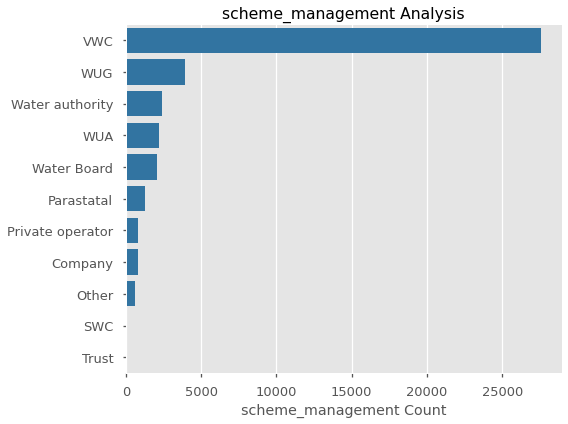


scheme_management - Value Counts:
---------------------------------


VWC                 27566
WUG                  3898
NaN                  2918
Water authority      2375
WUA                  2179
Water Board          2040
Parastatal           1263
Private operator      803
Company               798
Other                 580
SWC                    72
Trust                  58
Name: scheme_management, dtype: int64


scheme_management - Unique Values
---------------------------------
12 unique values (out of 44550).

scheme_management - NaN:
------------------------
6.55%
(2918/44550)


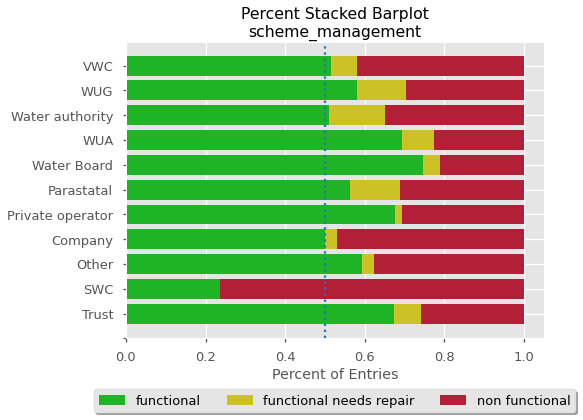

In [44]:
preliminary_eda(X_train, 'scheme_management', n_top_features=20, 
                interact_with_series=y_train)

> **Missing values must be imputed. This could feasibly be an indicator.**

In [45]:
TO_DO_NOTES.append('Impute `scheme_management` NaN to `missing`')

### scheme_name

**************************************************************
*                    scheme_name Analysis                    *
**************************************************************
Who operates the waterpoint
---------------------------


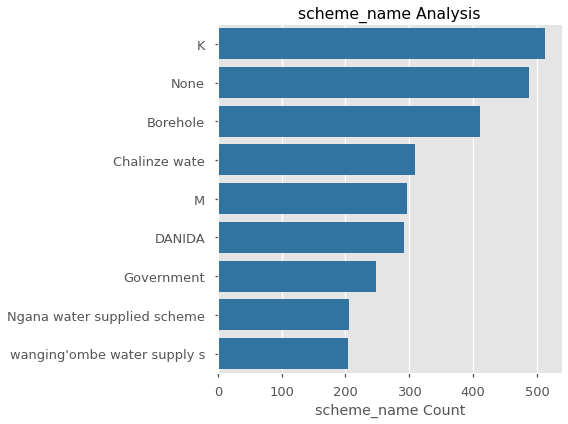


scheme_name - Value Counts:
---------------------------


NaN                            21060
K                                513
None                             487
Borehole                         411
Chalinze wate                    309
M                                296
DANIDA                           291
Government                       248
Ngana water supplied scheme      205
wanging'ombe water supply s      204
Name: scheme_name, dtype: int64


scheme_name - Unique Values
---------------------------
2501 unique values (out of 44550).

scheme_name - NaN:
------------------
47.27%
(21060/44550)


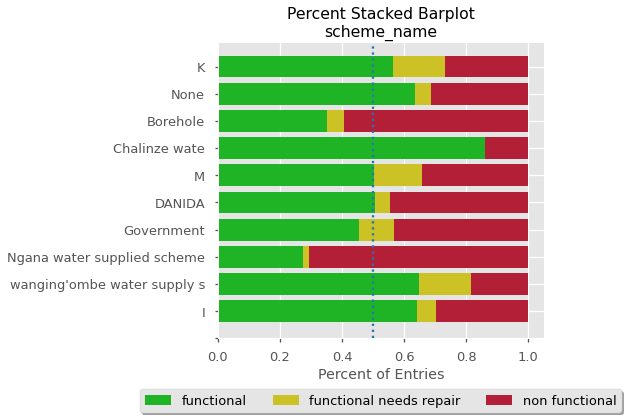

In [46]:
preliminary_eda(X_train, 'scheme_name', 
                interact_with_series=y_train)

> **There are 2500 unique values here, the column is redundant, and 47% missing. I will be dropping this column.** 

In [47]:
COLS_TO_DROP.append('scheme_name')

### permit

*********************************************************
*                    permit Analysis                    *
*********************************************************
If the waterpoint is permitted
------------------------------


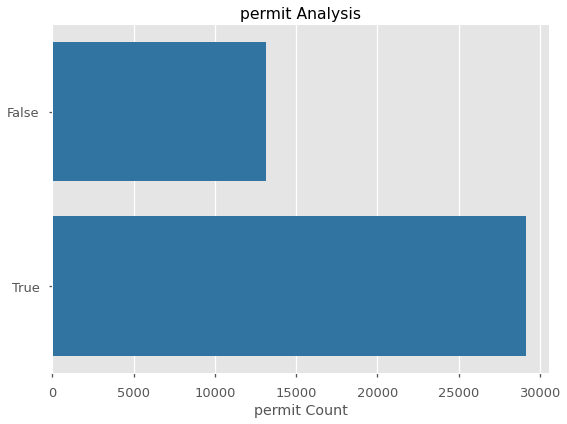


permit - Value Counts:
----------------------


True     29124
False    13117
NaN       2309
Name: permit, dtype: int64


permit - Unique Values
----------------------
3 unique values (out of 44550).

permit - NaN:
-------------
5.18%
(2309/44550)


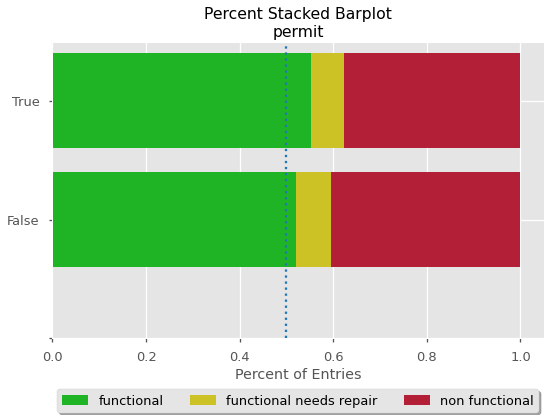

In [48]:
preliminary_eda(X_train, 'permit', 
                interact_with_series=y_train)

In [49]:
TO_DO_NOTES.append('Impute `permit` NaN to `missing`.')

### construction_year

********************************************************************
*                    construction_year Analysis                    *
********************************************************************
Year the waterpoint was constructed
-----------------------------------


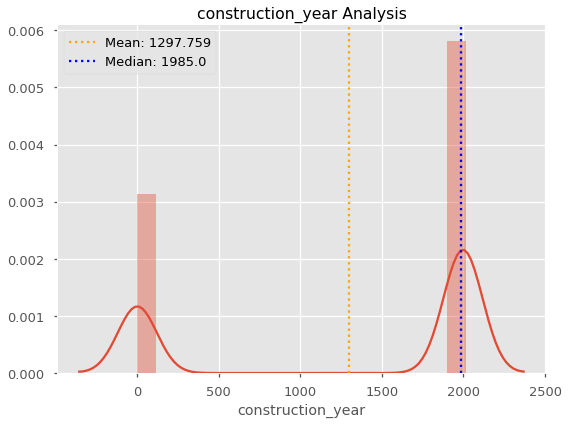


construction_year - Value Counts:
---------------------------------


0       15596
2010     1992
2008     1924
2009     1892
2000     1589
2007     1182
2006     1091
2003      957
2011      946
2004      852
Name: construction_year, dtype: int64


construction_year - Unique Values
---------------------------------
55 unique values (out of 44550).

construction_year - NaN:
------------------------
0.0%
(0/44550)


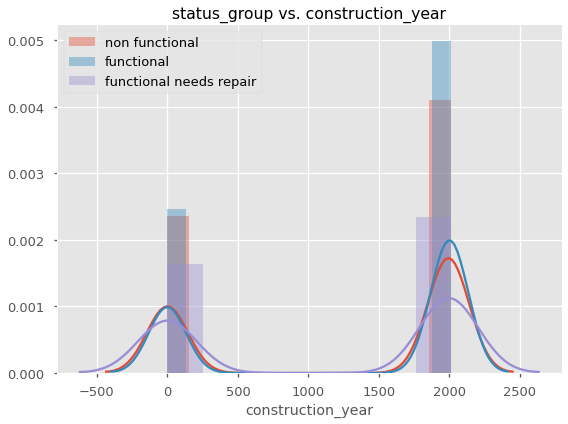

In [50]:
preliminary_eda(X_train, 'construction_year', 
                interact_with_series=y_train)

> - There are 15000 missing values (represented by 0)

**************************************************************************
*                    construction_year Non-NaN Values                    *
**************************************************************************
Year the waterpoint was constructed
-----------------------------------


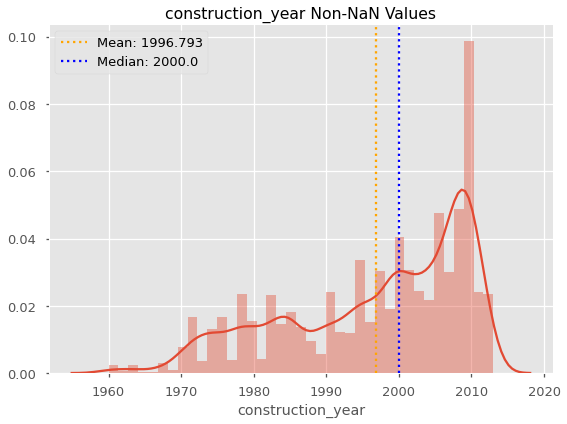


construction_year - Value Counts:
---------------------------------


2010    1992
2008    1924
2009    1892
2000    1589
2007    1182
2006    1091
2003     957
2011     946
2004     852
2002     794
Name: construction_year, dtype: int64


construction_year - Unique Values
---------------------------------
54 unique values (out of 28954).

construction_year - NaN:
------------------------
0.0%
(0/28954)


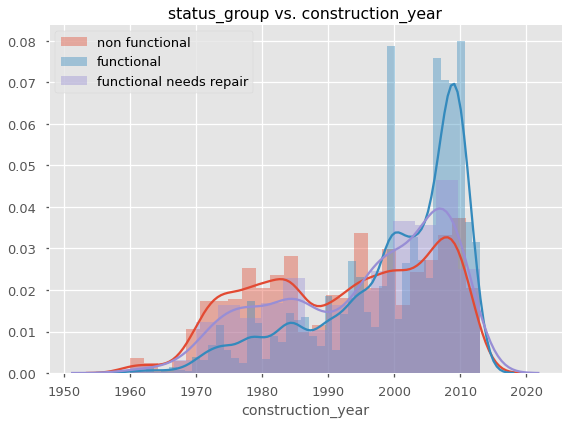

In [51]:
const_yr = X_train[X_train['construction_year'] > 0].copy()

preliminary_eda(const_yr, 
                'construction_year', 
                title='construction_year Non-NaN Values', 
                interact_with_series=y_train[const_yr.index])

> **The missing values have already been imputed with an arbitrary value (0). I will not need to impute these values for now.**
 - Options for later include milling these in with the median year.

- I will create a column to represent the age of the water pump.

### extraction_type

******************************************************************
*                    extraction_type Analysis                    *
******************************************************************
The kind of extraction the waterpoint uses
------------------------------------------


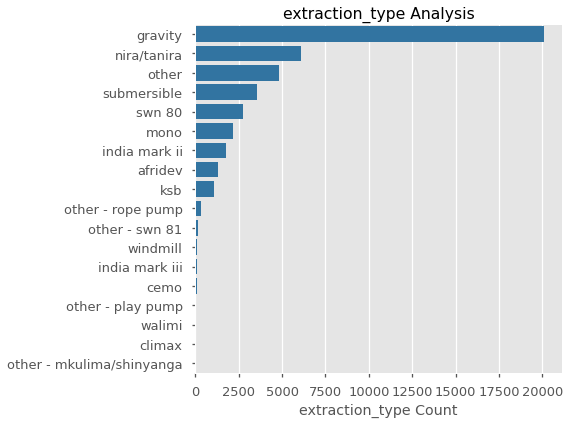


extraction_type - Value Counts:
-------------------------------


gravity                      20100
nira/tanira                   6117
other                         4825
submersible                   3557
swn 80                        2764
mono                          2161
india mark ii                 1760
afridev                       1305
ksb                           1071
other - rope pump              342
other - swn 81                 181
windmill                        99
india mark iii                  77
cemo                            71
other - play pump               61
walimi                          33
climax                          25
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64


extraction_type - Unique Values
-------------------------------
18 unique values (out of 44550).

extraction_type - NaN:
----------------------
0.0%
(0/44550)


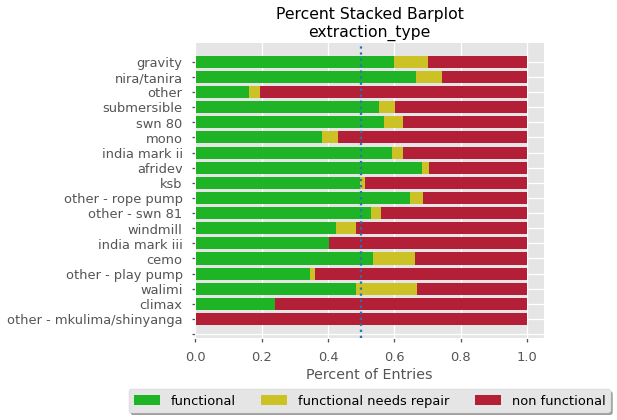

In [52]:
preliminary_eda(X_train, 'extraction_type', n_top_features=20, 
                interact_with_series=y_train)

> **This seems to be a useful predictor which will be one-hot-encoded.**

### extraction_type_group

************************************************************************
*                    extraction_type_group Analysis                    *
************************************************************************
The kind of extraction the waterpoint uses
------------------------------------------


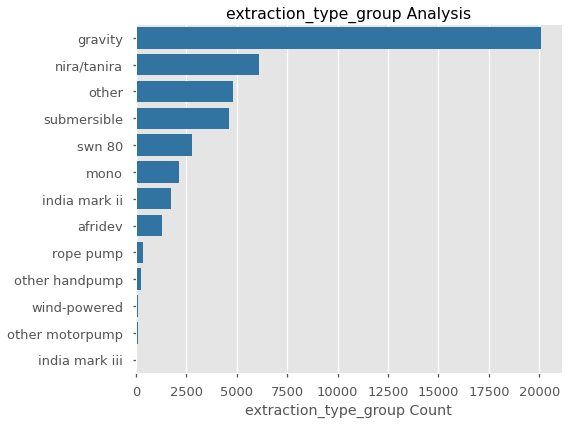


extraction_type_group - Value Counts:
-------------------------------------


gravity            20100
nira/tanira         6117
other               4825
submersible         4628
swn 80              2764
mono                2161
india mark ii       1760
afridev             1305
rope pump            342
other handpump       276
wind-powered          99
other motorpump       96
india mark iii        77
Name: extraction_type_group, dtype: int64


extraction_type_group - Unique Values
-------------------------------------
13 unique values (out of 44550).

extraction_type_group - NaN:
----------------------------
0.0%
(0/44550)


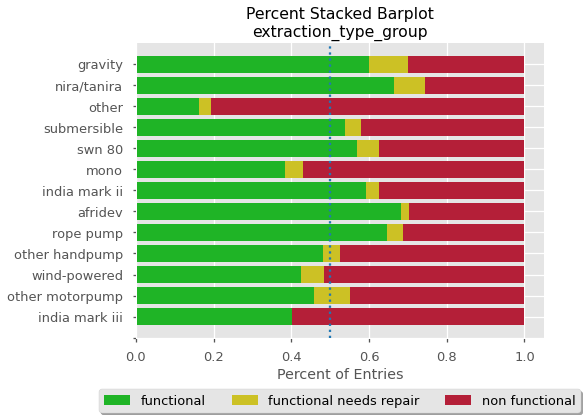

In [53]:
preliminary_eda(X_train, 'extraction_type_group', n_top_features=20, 
                interact_with_series=y_train)

> **Similar to extraction_type.**

### extraction_type_class

************************************************************************
*                    extraction_type_class Analysis                    *
************************************************************************
The kind of extraction the waterpoint uses
------------------------------------------


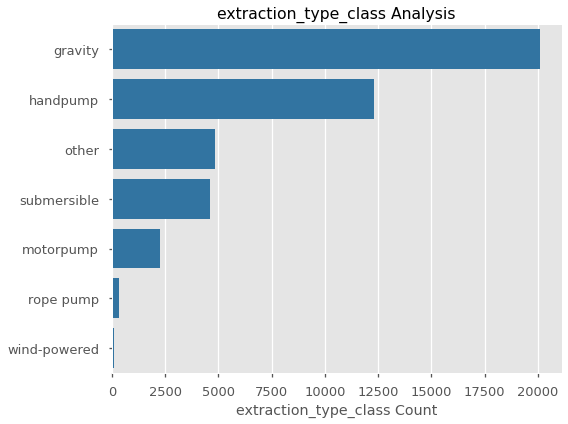


extraction_type_class - Value Counts:
-------------------------------------


gravity         20100
handpump        12299
other            4825
submersible      4628
motorpump        2257
rope pump         342
wind-powered       99
Name: extraction_type_class, dtype: int64


extraction_type_class - Unique Values
-------------------------------------
7 unique values (out of 44550).

extraction_type_class - NaN:
----------------------------
0.0%
(0/44550)


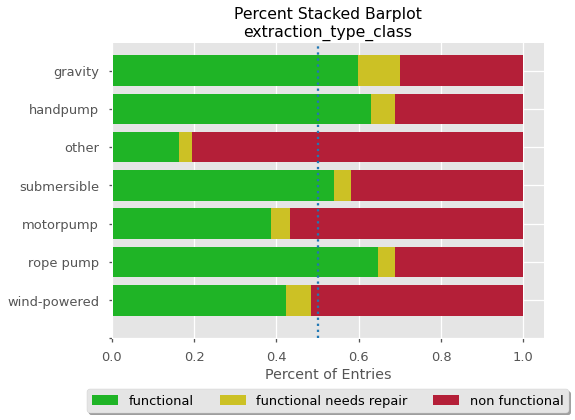

In [54]:
preliminary_eda(X_train, 'extraction_type_class', n_top_features=20, 
                interact_with_series=y_train)

> **The most vague of extraction_type columns. Still very similar.**

### management

*************************************************************
*                    management Analysis                    *
*************************************************************
How the waterpoint is managed
-----------------------------


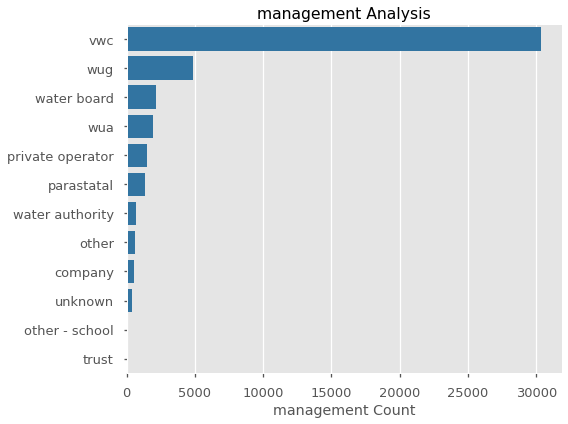


management - Value Counts:
--------------------------


vwc                 30347
wug                  4891
water board          2189
wua                  1904
private operator     1504
parastatal           1322
water authority       686
other                 638
company               515
unknown               421
other - school         74
trust                  59
Name: management, dtype: int64


management - Unique Values
--------------------------
12 unique values (out of 44550).

management - NaN:
-----------------
0.0%
(0/44550)


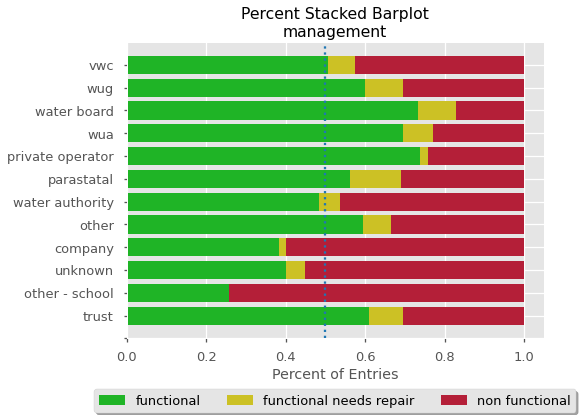

In [55]:
preliminary_eda(X_train, 'management', n_top_features=20, 
                interact_with_series=y_train)

### management_group

*******************************************************************
*                    management_group Analysis                    *
*******************************************************************
How the waterpoint is managed
-----------------------------


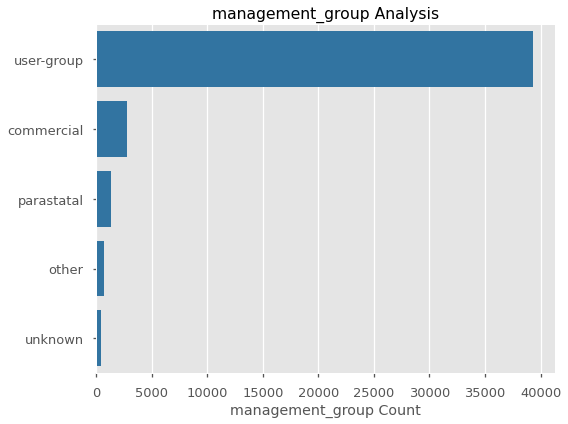


management_group - Value Counts:
--------------------------------


user-group    39331
commercial     2764
parastatal     1322
other           712
unknown         421
Name: management_group, dtype: int64


management_group - Unique Values
--------------------------------
5 unique values (out of 44550).

management_group - NaN:
-----------------------
0.0%
(0/44550)


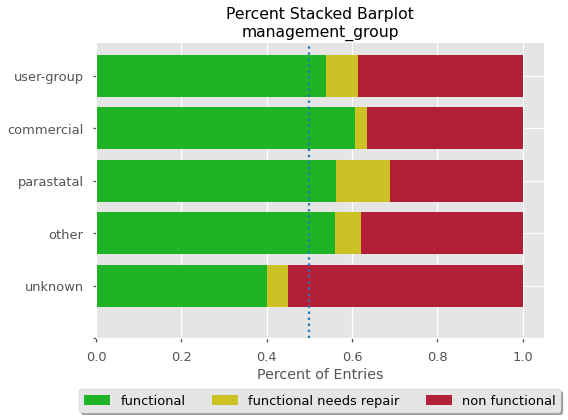

In [56]:
preliminary_eda(X_train, 'management_group', 
                interact_with_series=y_train)

### payment

**********************************************************
*                    payment Analysis                    *
**********************************************************
What the water costs
--------------------


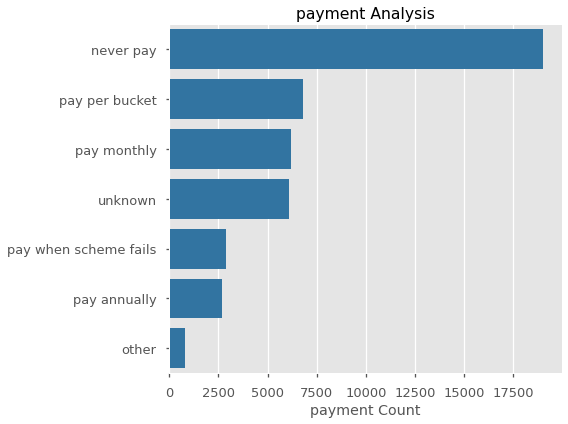


payment - Value Counts:
-----------------------


never pay                19003
pay per bucket            6799
pay monthly               6213
unknown                   6107
pay when scheme fails     2914
pay annually              2705
other                      809
Name: payment, dtype: int64


payment - Unique Values
-----------------------
7 unique values (out of 44550).

payment - NaN:
--------------
0.0%
(0/44550)


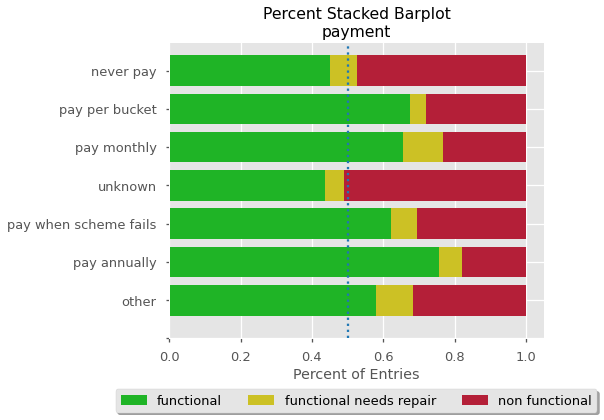

In [57]:
preliminary_eda(X_train, 'payment', 
                interact_with_series=y_train)

### payment_type

***************************************************************
*                    payment_type Analysis                    *
***************************************************************
What the water costs
--------------------


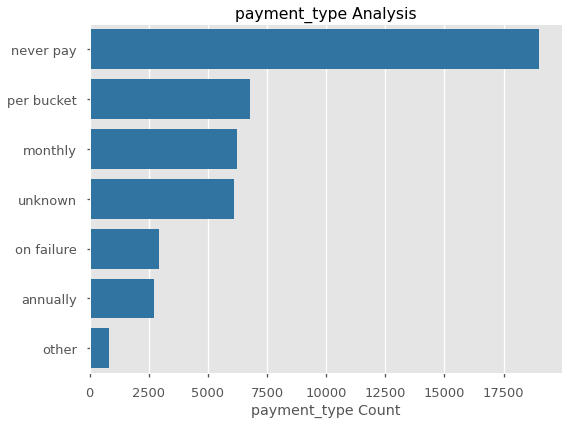


payment_type - Value Counts:
----------------------------


never pay     19003
per bucket     6799
monthly        6213
unknown        6107
on failure     2914
annually       2705
other           809
Name: payment_type, dtype: int64


payment_type - Unique Values
----------------------------
7 unique values (out of 44550).

payment_type - NaN:
-------------------
0.0%
(0/44550)


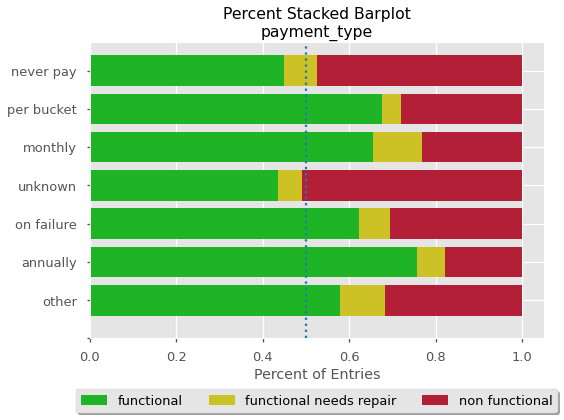

In [58]:
preliminary_eda(X_train, 'payment_type', 
                interact_with_series=y_train)

> **This seems like a duplicate of payment.**

### water_quality

****************************************************************
*                    water_quality Analysis                    *
****************************************************************
The quality of the water
------------------------


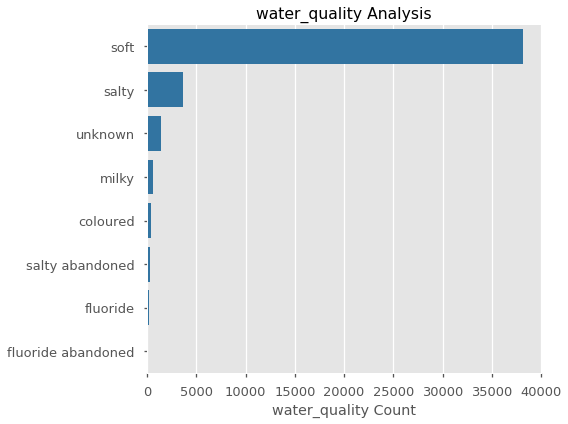


water_quality - Value Counts:
-----------------------------


soft                  38122
salty                  3638
unknown                1393
milky                   611
coloured                360
salty abandoned         259
fluoride                151
fluoride abandoned       16
Name: water_quality, dtype: int64


water_quality - Unique Values
-----------------------------
8 unique values (out of 44550).

water_quality - NaN:
--------------------
0.0%
(0/44550)


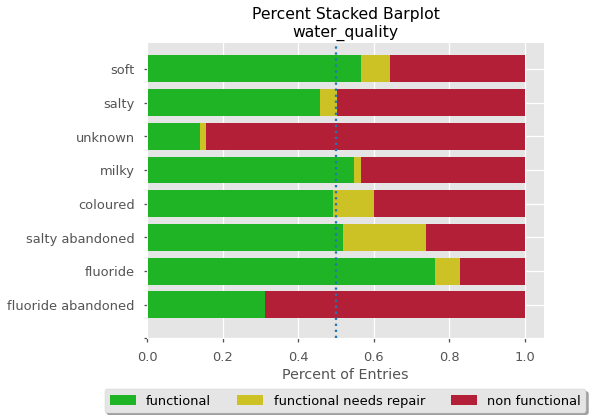

In [59]:
preliminary_eda(X_train, 'water_quality', 
                interact_with_series=y_train)

### quality_group

****************************************************************
*                    quality_group Analysis                    *
****************************************************************
The quality of the water
------------------------


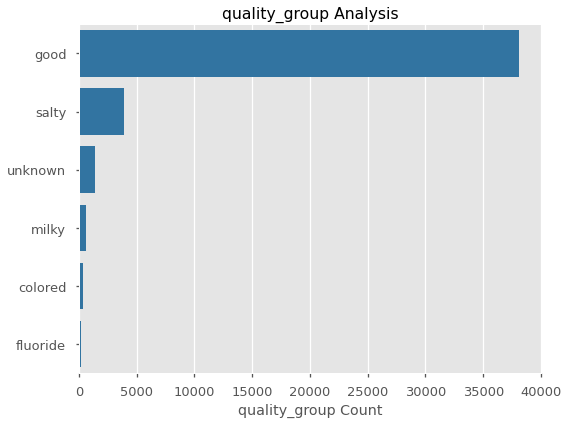


quality_group - Value Counts:
-----------------------------


good        38122
salty        3897
unknown      1393
milky         611
colored       360
fluoride      167
Name: quality_group, dtype: int64


quality_group - Unique Values
-----------------------------
6 unique values (out of 44550).

quality_group - NaN:
--------------------
0.0%
(0/44550)


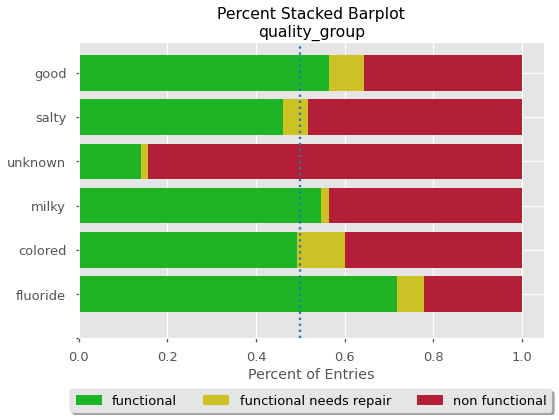

In [60]:
preliminary_eda(X_train, 'quality_group', 
                interact_with_series=y_train)

### quantity

***********************************************************
*                    quantity Analysis                    *
***********************************************************
The quantity of water
---------------------


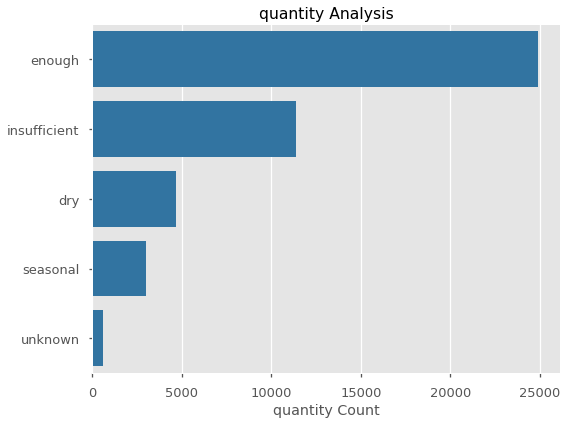


quantity - Value Counts:
------------------------


enough          24895
insufficient    11376
dry              4686
seasonal         3023
unknown           570
Name: quantity, dtype: int64


quantity - Unique Values
------------------------
5 unique values (out of 44550).

quantity - NaN:
---------------
0.0%
(0/44550)


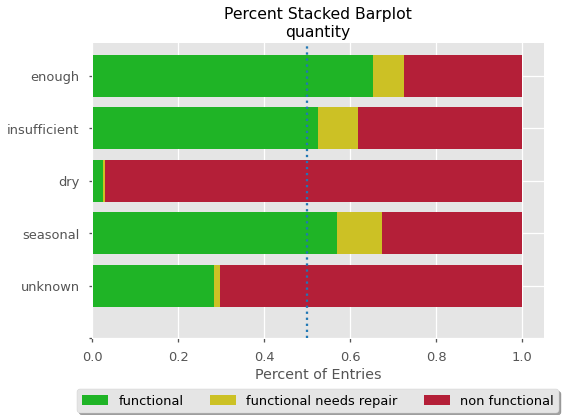

In [61]:
preliminary_eda(X_train, 'quantity', 
                interact_with_series=y_train)

> **This might be similar to amount_tsh.**

### quantity_group

*****************************************************************
*                    quantity_group Analysis                    *
*****************************************************************
The quantity of water
---------------------


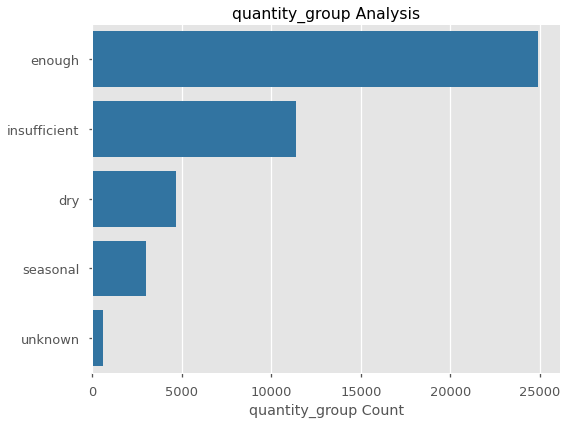


quantity_group - Value Counts:
------------------------------


enough          24895
insufficient    11376
dry              4686
seasonal         3023
unknown           570
Name: quantity_group, dtype: int64


quantity_group - Unique Values
------------------------------
5 unique values (out of 44550).

quantity_group - NaN:
---------------------
0.0%
(0/44550)


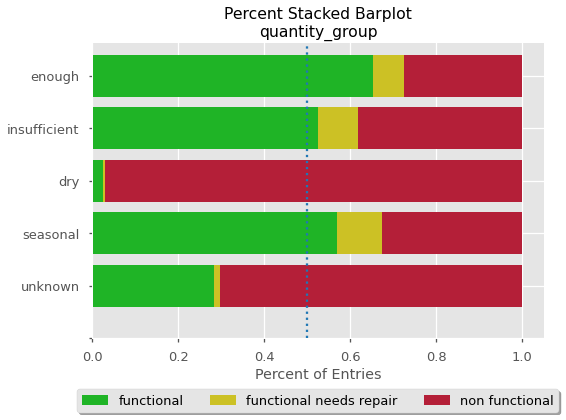

In [62]:
preliminary_eda(X_train, 'quantity_group', 
                interact_with_series=y_train)

> **This also looks like a redundant column (quantity).**

### source

*********************************************************
*                    source Analysis                    *
*********************************************************
The source of the water
-----------------------


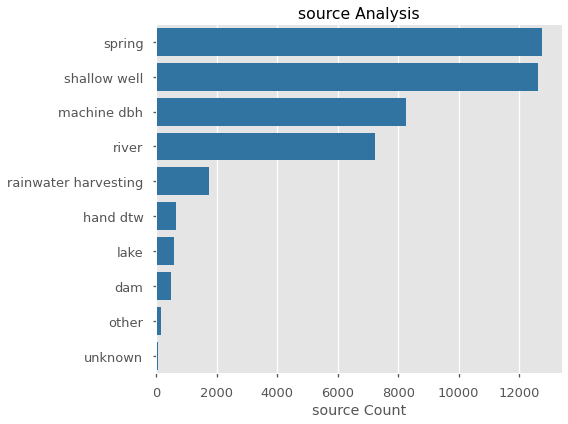


source - Value Counts:
----------------------


spring                  12760
shallow well            12605
machine dbh              8263
river                    7228
rainwater harvesting     1741
hand dtw                  661
lake                      579
dam                       501
other                     158
unknown                    54
Name: source, dtype: int64


source - Unique Values
----------------------
10 unique values (out of 44550).

source - NaN:
-------------
0.0%
(0/44550)


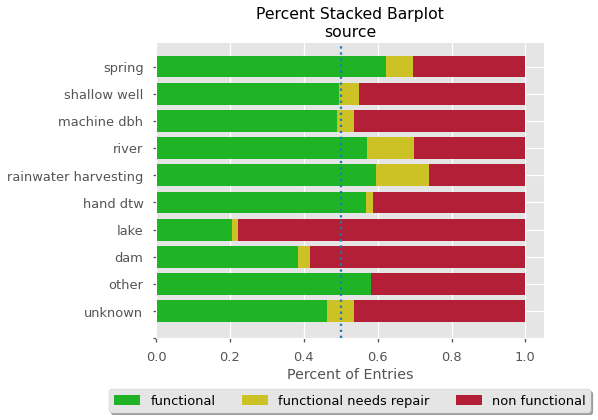

In [63]:
preliminary_eda(X_train, 'source', 
                interact_with_series=y_train)

### source_type

**************************************************************
*                    source_type Analysis                    *
**************************************************************
The source of the water
-----------------------


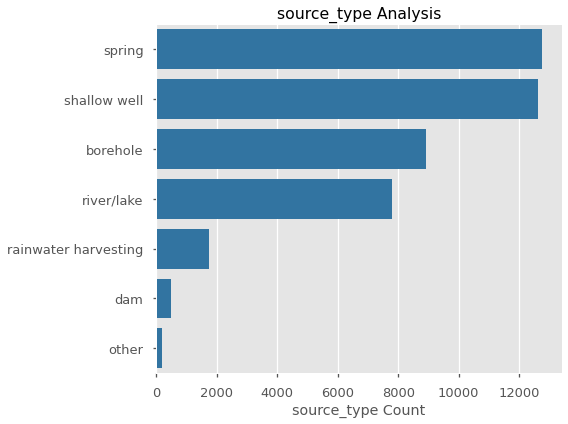


source_type - Value Counts:
---------------------------


spring                  12760
shallow well            12605
borehole                 8924
river/lake               7807
rainwater harvesting     1741
dam                       501
other                     212
Name: source_type, dtype: int64


source_type - Unique Values
---------------------------
7 unique values (out of 44550).

source_type - NaN:
------------------
0.0%
(0/44550)


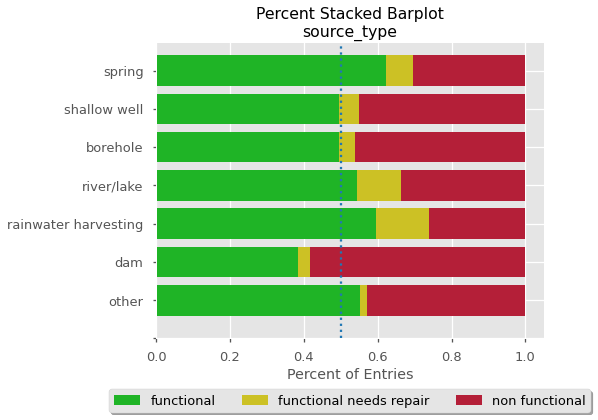

In [64]:
preliminary_eda(X_train, 'source_type', 
                interact_with_series=y_train)

> **Another probable duplicate column.**

### source_class

***************************************************************
*                    source_class Analysis                    *
***************************************************************
The source of the water
-----------------------


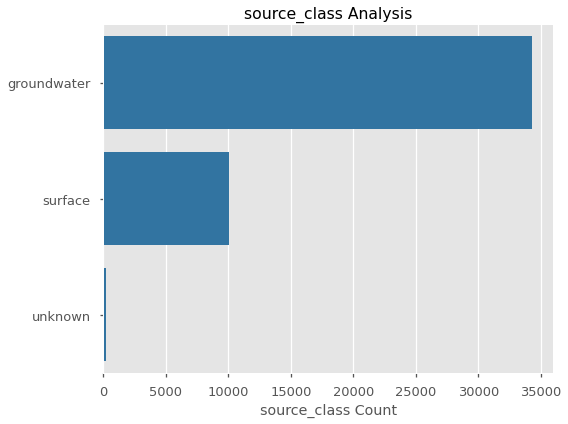


source_class - Value Counts:
----------------------------


groundwater    34289
surface        10049
unknown          212
Name: source_class, dtype: int64


source_class - Unique Values
----------------------------
3 unique values (out of 44550).

source_class - NaN:
-------------------
0.0%
(0/44550)


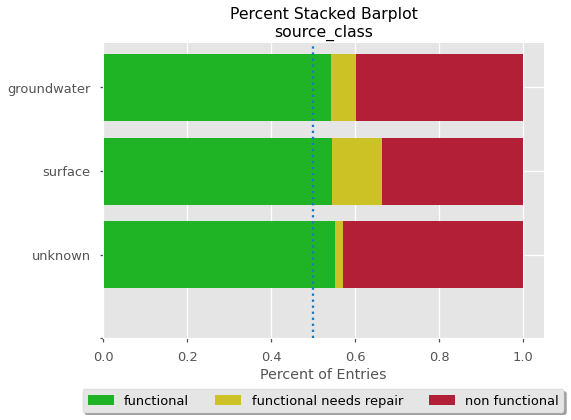

In [65]:
preliminary_eda(X_train, 'source_class', 
                interact_with_series=y_train)

### waterpoint_type

******************************************************************
*                    waterpoint_type Analysis                    *
******************************************************************
The kind of waterpoint
----------------------


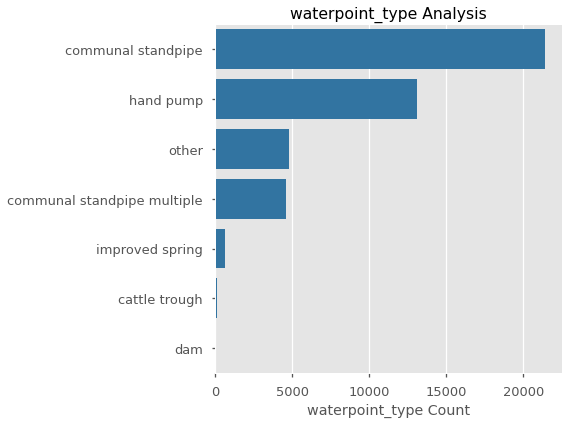


waterpoint_type - Value Counts:
-------------------------------


communal standpipe             21420
hand pump                      13066
other                           4806
communal standpipe multiple     4571
improved spring                  597
cattle trough                     85
dam                                5
Name: waterpoint_type, dtype: int64


waterpoint_type - Unique Values
-------------------------------
7 unique values (out of 44550).

waterpoint_type - NaN:
----------------------
0.0%
(0/44550)


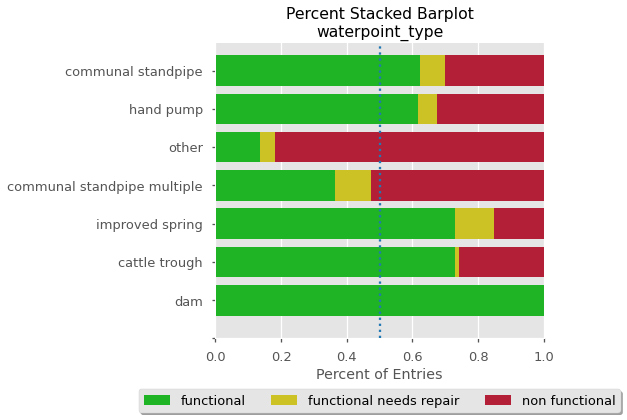

In [66]:
preliminary_eda(X_train, 'waterpoint_type', 
                interact_with_series=y_train)

### waterpoint_type_group

************************************************************************
*                    waterpoint_type_group Analysis                    *
************************************************************************
The kind of waterpoint
----------------------


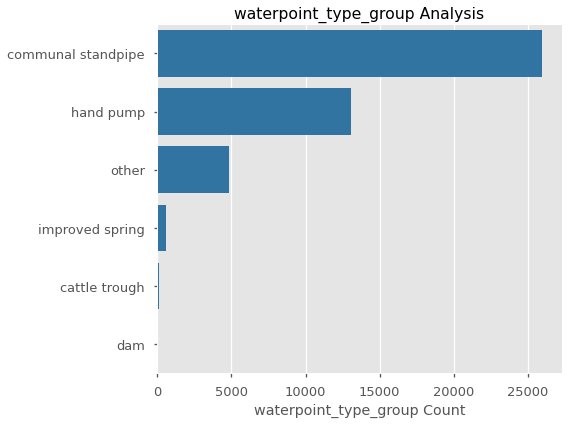


waterpoint_type_group - Value Counts:
-------------------------------------


communal standpipe    25991
hand pump             13066
other                  4806
improved spring         597
cattle trough            85
dam                       5
Name: waterpoint_type_group, dtype: int64


waterpoint_type_group - Unique Values
-------------------------------------
6 unique values (out of 44550).

waterpoint_type_group - NaN:
----------------------------
0.0%
(0/44550)


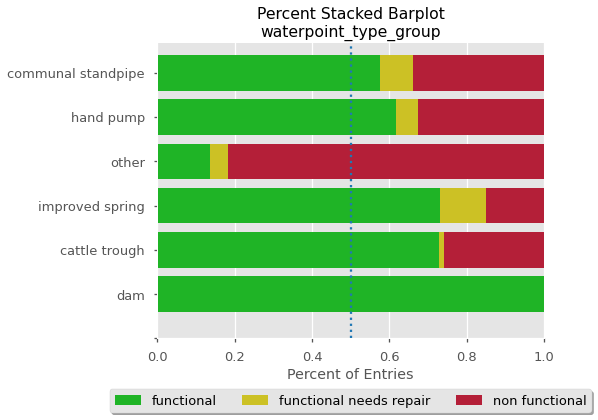

In [67]:
preliminary_eda(X_train, 'waterpoint_type_group', 
                interact_with_series=y_train)

> **Another probable redundant column.**

## Comments

***

Several thoughts.

- There are many columns representing geographical location. It might be a good idea to compile these columns and thoughtfully select which one/ones are the best predictors.
- There are many columns which seem to be duplicated. It would be worthwhile to see if we can join these columns somehow.
- There are many more categorical columns than continuous columns.

### To-do Notes

In [68]:
# Notes made during first pass at EDA.
TO_DO_NOTES

['Make categorical column - "amount_tsh" > 0.',
 'Impute `funder` col for NaN: `missing`',
 'Engineer `gps_height` into three binned values.',
 'Engineer column: `installer` == `DWE`.',
 'Transform region_code to categorical.',
 'Transform district_code to categorical.',
 'Impute `public_meeting` NaN values with `missing`.',
 'Impute `scheme_management` NaN to `missing`',
 'Impute `permit` NaN to `missing`.']

### Cols to-drop

In [69]:
# Non-predictive columns.
COLS_TO_DROP

['id', 'date_recorded', 'installer', 'wpt_name', 'recorded_by', 'scheme_name']

# Feature Engineering

## Creating columns

In [70]:
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

**Create `years_old` column.**

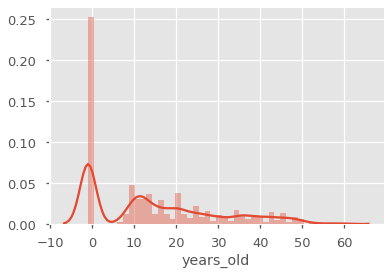

In [71]:
# Difference between current year and construction year.
X_train_eng['years_old'] = 2020 - X_train_eng['construction_year']
X_test_eng['years_old'] = 2020 - X_test_eng['construction_year']
unlabeled_y['years_old'] = 2020 - unlabeled_y['construction_year']

X_train_eng.drop('construction_year', axis=1, inplace=True)
X_test_eng.drop('construction_year', axis=1, inplace=True)
unlabeled_y.drop('construction_year', axis=1, inplace=True)

# Functionalize the imputation.
# Since missing values were marked as 0, they are now marked as 2020 (2020 - 0).
def impute_years_old(x, nan_val=2020, replacement_val=-1):
    if x == nan_val:
        return replacement_val
    return x


X_train_eng['years_old'] = X_train_eng['years_old'].apply(impute_years_old)
X_test_eng['years_old'] = X_test_eng['years_old'].apply(impute_years_old)
unlabeled_y['years_old'] = unlabeled_y['years_old'].apply(impute_years_old)

sns.distplot(X_train_eng['years_old']);

## Checking seemingly identical columns
**`extraction` vs `extraction_type` vs `extraction_group_type`**

In [72]:
# looking at two columns, find the rows where one col does not match the other.
diff = X_train_eng[
    X_train_eng['extraction_type'] != X_train_eng['extraction_type_group']
][['extraction_type', 'extraction_type_group']].copy()

diff.head()

extraction_type extraction_type_group
18976                ksb           submersible
50022     other - swn 81        other handpump
10315                ksb           submersible
36217                ksb           submersible
4761   other - rope pump             rope pump

In [73]:
# See if we will see a variety of values for each 'extraction_type'.
diff.groupby('extraction_type').get_group('ksb')[
    'extraction_type_group'].value_counts()

submersible    1071
Name: extraction_type_group, dtype: int64

- Clearly, for example, all entries of `'ksb'` in `extraction_type` are called `'submersible'` in `extraction_type_group`.
- I'm choosing to keep `'extraction_type_group'` because it is a good middle ground between too specific (`extraction_type`) and too vague (`extraction_type_class`).

In [74]:
# Dropping two of the three extraction columns.
X_train_eng.drop('extraction_type', axis=1, inplace=True)
X_test_eng.drop('extraction_type', axis=1, inplace=True)
unlabeled_y.drop('extraction_type', axis=1, inplace=True)

X_train_eng.drop('extraction_type_class', axis=1, inplace=True)
X_test_eng.drop('extraction_type_class', axis=1, inplace=True)
unlabeled_y.drop('extraction_type_class', axis=1, inplace=True)

**`payment` vs `payment_type`**

In [75]:
# Comparing side-by-side.
X_train_eng[['payment', 'payment_type']].head(20)

payment payment_type
32249           other        other
58381  pay per bucket   per bucket
16126         unknown      unknown
18554     pay monthly      monthly
12942    pay annually     annually
34640       never pay    never pay
57632       never pay    never pay
5719          unknown      unknown
18976  pay per bucket   per bucket
44321       never pay    never pay
43673       never pay    never pay
52296     pay monthly      monthly
59061       never pay    never pay
43641         unknown      unknown
45974  pay per bucket   per bucket
5096        never pay    never pay
42752       never pay    never pay
5986        never pay    never pay
28546       never pay    never pay
21638     pay monthly      monthly

This is obviously redundant.

In [76]:
# Dropping the extra column.
X_train_eng.drop('payment', axis=1, inplace=True)
X_test_eng.drop('payment', axis=1, inplace=True)
unlabeled_y.drop('payment', axis=1, inplace=True)

**`water_quality` vs `quality_group`**

In [77]:
# Another method of looking for redundancy.
wc = X_train_eng[['water_quality', 'quality_group']].groupby('water_quality')

# Create a dictionary of {value: value_count Series}.
wc_dct = {}
for v in X_train_eng['water_quality'].unique():
    wc_dct[v] = wc.get_group(v)['quality_group'].value_counts()
    
for k, v in wc_dct.items():
    print(f'{k}:\n{v}\n')

soft:
good    38122
Name: quality_group, dtype: int64

salty:
salty    3638
Name: quality_group, dtype: int64

unknown:
unknown    1393
Name: quality_group, dtype: int64

salty abandoned:
salty    259
Name: quality_group, dtype: int64

milky:
milky    611
Name: quality_group, dtype: int64

coloured:
colored    360
Name: quality_group, dtype: int64

fluoride:
fluoride    151
Name: quality_group, dtype: int64

fluoride abandoned:
fluoride    16
Name: quality_group, dtype: int64



Clearly these are different names for the same things.

In [78]:
# Dropping extra columns.
X_train_eng.drop('quality_group', axis=1, inplace=True)
X_test_eng.drop('quality_group', axis=1, inplace=True)
unlabeled_y.drop('quality_group', axis=1, inplace=True)

**Quantity group is redundant as well.**

In [79]:
# Dropping extra columns.
X_train_eng.drop('quantity_group', axis=1, inplace=True)
X_test_eng.drop('quantity_group', axis=1, inplace=True)
unlabeled_y.drop('quantity_group', axis=1, inplace=True)

**And finally, `source_type` and `source_class`.**

In [80]:
# Dropping extra columns.
X_train_eng.drop('source_type', axis=1, inplace=True)
X_test_eng.drop('source_type', axis=1, inplace=True)
unlabeled_y.drop('source_type', axis=1, inplace=True)

X_train_eng.drop('source_class', axis=1, inplace=True)
X_test_eng.drop('source_class', axis=1, inplace=True)
unlabeled_y.drop('source_class', axis=1, inplace=True)

### From Notes:

In [81]:
TO_DO_NOTES

['Make categorical column - "amount_tsh" > 0.',
 'Impute `funder` col for NaN: `missing`',
 'Engineer `gps_height` into three binned values.',
 'Engineer column: `installer` == `DWE`.',
 'Transform region_code to categorical.',
 'Transform district_code to categorical.',
 'Impute `public_meeting` NaN values with `missing`.',
 'Impute `scheme_management` NaN to `missing`',
 'Impute `permit` NaN to `missing`.']

**Make categorical column - `amount_tsh` > 0.**

In [82]:
# Create boolean category.
X_train_eng['tsh_exists'] = (X_train_eng['amount_tsh'] > 1).astype(int)
X_test_eng['tsh_exists'] = (X_test_eng['amount_tsh'] > 1).astype(int)
unlabeled_y['tsh_exists'] = (unlabeled_y['amount_tsh'] > 1).astype(int)


TO_DO_NOTES.remove('Make categorical column - "amount_tsh" > 0.')

**Engineer `gps_height` into three binned values.**

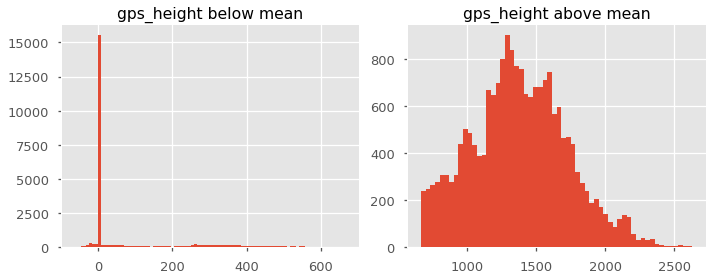

In [83]:
# As noted during EDA for `gps_height`, there seem to be three populations.
# I will use some simple eyeballing for now to determine the best splits.
gps_mean = X_train_eng['gps_height'].mean()

# Plot histograms seperated by the mean.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# Greater than the mean.
X_train_eng['gps_height'][
    X_train_eng['gps_height'] < gps_mean].hist(bins='auto', ax=ax1)
ax1.set(title='gps_height below mean')

# Less than the mean.
X_train_eng['gps_height'][
    X_train_eng['gps_height'] >= gps_mean].hist(bins='auto', ax=ax2)
ax2.set(title='gps_height above mean')

fig.tight_layout()

- The *gps_height above mean* chart looks like a well-represented population (give or take).
- The below-mean populations need to be cut.

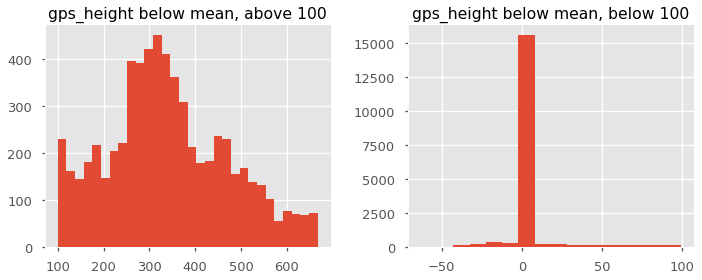

In [84]:
# Plot seperation below the mean.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# Greater than 100.
X_train_eng['gps_height'][
    (X_train_eng['gps_height'] < gps_mean) & \
    (X_train_eng['gps_height'] >= 100)].hist(bins='auto', ax=ax1)
ax1.set(title='gps_height below mean, above 100')

# Below 100 (including the mass at 0).
X_train_eng['gps_height'][
    (X_train_eng['gps_height'] < gps_mean) & \
    (X_train_eng['gps_height'] < 100)].hist(bins='auto', ax=ax2)
ax2.set(title='gps_height below mean, below 100')

fig.tight_layout()

These seem like three somewhat distinct populations, so I'll use these values to begin with.

In [85]:
# Functionalize the binning.
def bin_gps(x, low_cut=100, upp_cut=gps_mean):
    if x < low_cut:
        return 'low_altitude'
    if x < gps_mean:
        return 'med_altitude'
    return 'high_altitude'

# Apply the binning.
X_train_eng['altitude_cat'] = X_train_eng['gps_height'].apply(bin_gps)
X_test_eng['altitude_cat'] = X_test_eng['gps_height'].apply(bin_gps)
unlabeled_y['altitude_cat'] = unlabeled_y['gps_height'].apply(bin_gps)

TO_DO_NOTES.remove('Engineer `gps_height` into three binned values.')

**Engineer column: `installer` == `DWE`.**

In [86]:
# Create boolean column.
X_train_eng['installed_by_DWE'] = (
    X_train_eng['installer'] == 'DWE').astype(int)
X_test_eng['installed_by_DWE'] = (
    X_test_eng['installer'] == 'DWE').astype(int)
unlabeled_y['installed_by_DWE'] = (
    unlabeled_y['installer'] == 'DWE').astype(int)

TO_DO_NOTES.remove('Engineer column: `installer` == `DWE`.')

In [87]:
TO_DO_NOTES

['Impute `funder` col for NaN: `missing`',
 'Transform region_code to categorical.',
 'Transform district_code to categorical.',
 'Impute `public_meeting` NaN values with `missing`.',
 'Impute `scheme_management` NaN to `missing`',
 'Impute `permit` NaN to `missing`.']

## Feature Selection with Decision Tree
### Geographic Columns
Since there are an unbelievable number of categories in some of these columns, I'm going to utilize a Decision Tree Classifier to choose the most important features from these columns. From these, I will drop the column but keep the most important n-columns.

In [88]:
X_train_filtered = X_train_eng.copy()
X_test_filtered = X_test_eng.copy()

In [89]:
def top_features_decision_tree(X_train, y_train, columns_lst, top_n=25):
    """
    Functionalize the Decision Tree selection process.
    Returns a top-n-features dataframe.
    """
    # Create a one-hot-encoded dataframe from the X_train[columns_lst].
    ohe_train = pd.get_dummies(X_train[columns_lst], 
                               columns=columns_lst)
    print(f'Training on dataframe shape: ({ohe_train.shape})')
    
    # Initialize the Stopwatch.
    watch = Stopwatch()
    
    # Use this one-hot-encoded dataframe to fit the tree.
    d_tree = DecisionTreeClassifier()
    d_tree.fit(ohe_train, y_train)
    
    # Show training time.
    watch.stop()
    watch.display_laps()
    
    # Create a feature-importance dataframe which will be returned.
    ohe_train_importance = pd.DataFrame(d_tree.feature_importances_, 
                                         index=ohe_train.columns, 
                                         columns=['importance'])
    top_feats = ohe_train_importance.sort_values('importance', 
                                                  ascending=False).head(top_n)
    top_feats.reset_index(inplace=True)
    return top_feats

Training on dataframe shape: ((44550, 18898))


Label                  Timestamp  Elapsed Time (sec)
0  Start 2020-10-02 09:51:42.370282             0.00000
1   Stop 2020-10-02 09:53:23.568862           101.19858

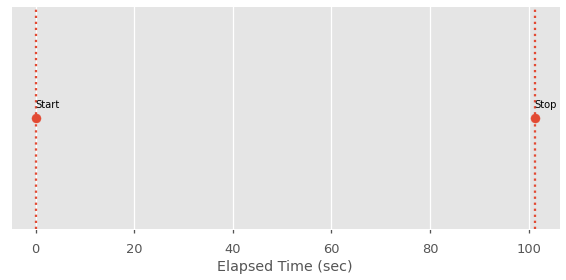

index  importance
0                  region_Iringa    0.024931
1  basin_Ruvuma / Southern Coast    0.009686
2                  region_Arusha    0.006093
3                    lga_Bariadi    0.006071
4                       lga_Siha    0.006067

In [90]:
# Use the COL_DESRIPTIONS dictionary to 
# pull out columns which describe the geography.
# (Above: 4.0.1. Also in support_functions.py)
geographic_cols = [c for c in COL_DESCRIPTIONS 
                   if 'Geographic' in COL_DESCRIPTIONS[c]]

top_25_geo = top_features_decision_tree(X_train_filtered, y_train,
                                        geographic_cols,
                                        top_n=25)
top_25_geo.head()

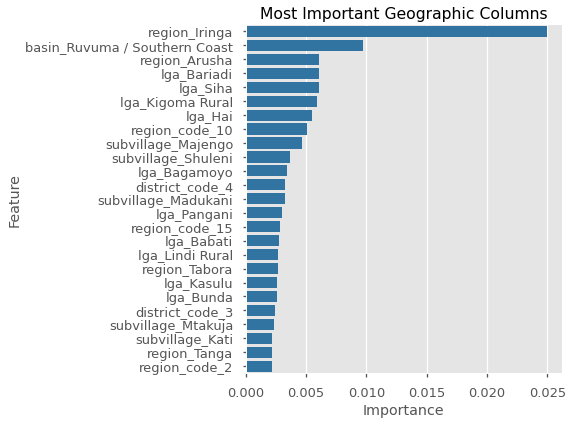

In [91]:
# Plot geographical feature importances.
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='importance', y='index', orient='h', 
            data=top_25_geo, ax=ax, color=COLOR)
ax.set(title='Most Important Geographic Columns', 
       xlabel='Importance', 
       ylabel='Feature')

fig.tight_layout()

In [92]:
# We can find the original column these features 
# come from by using the first part of their name. 
# (eg: region_Iringa: "parent column" is `region`)
parent_child_cols = []

# Iterate through each geographical column 
# to find the parent columns for each value.
for col in geographic_cols:
    for feature in top_25_geo['index'].values:
        if feature.startswith(col):
            if col == 'region' and feature.startswith('region_code'):
                # This is the only abnormality with name-overlap.
                continue
            parent_child_cols.append((col, feature[len(col)+1:]))

parent_child_cols

[('basin', 'Ruvuma / Southern Coast'),
 ('subvillage', 'Majengo'),
 ('subvillage', 'Shuleni'),
 ('subvillage', 'Madukani'),
 ('subvillage', 'Mtakuja'),
 ('subvillage', 'Kati'),
 ('region', 'Iringa'),
 ('region', 'Arusha'),
 ('region', 'Tabora'),
 ('region', 'Tanga'),
 ('region_code', '10'),
 ('region_code', '15'),
 ('region_code', '2'),
 ('district_code', '4'),
 ('district_code', '3'),
 ('lga', 'Bariadi'),
 ('lga', 'Siha'),
 ('lga', 'Kigoma Rural'),
 ('lga', 'Hai'),
 ('lga', 'Bagamoyo'),
 ('lga', 'Pangani'),
 ('lga', 'Babati'),
 ('lga', 'Lindi Rural'),
 ('lga', 'Kasulu'),
 ('lga', 'Bunda')]

In [93]:
# Use this parent-child column-list to add the appropriate columns.
def set_important_geo_cols(dataframe, col_value_lst):
    df = dataframe.copy()
    for parent, child in col_value_lst:
        # Create a OHE column by hand using the col_value_lst.
        new_s = (df[parent].astype(str) == child)
        df[f'{parent}_{child}'] = new_s.astype(int)
    return df

X_train_filtered = set_important_geo_cols(X_train_filtered, parent_child_cols)
X_test_filtered = set_important_geo_cols(X_test_filtered, parent_child_cols)
unlabeled_y = set_important_geo_cols(unlabeled_y, parent_child_cols)

In [94]:
# Now that we've gotten the most important aspects 
# from these columns, we can consolidate our data.
X_train_filtered.drop(columns=geographic_cols, inplace=True)
X_test_filtered.drop(columns=geographic_cols, inplace=True)
unlabeled_y.drop(columns=geographic_cols, inplace=True)

In [95]:
X_train_filtered.shape, X_test_filtered.shape, y_train.shape, y_test.shape

((44550, 54), (14850, 54), (44550,), (14850,))

In [96]:
unlabeled_y.shape

(14850, 54)

****************************************************************
*                    region_Iringa Analysis                    *
****************************************************************


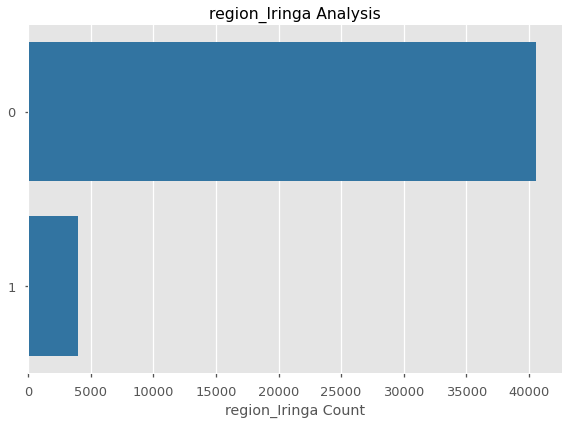


region_Iringa - Value Counts:
-----------------------------


0    40586
1     3964
Name: region_Iringa, dtype: int64


region_Iringa - Unique Values
-----------------------------
2 unique values (out of 44550).

region_Iringa - NaN:
--------------------
0.0%
(0/44550)


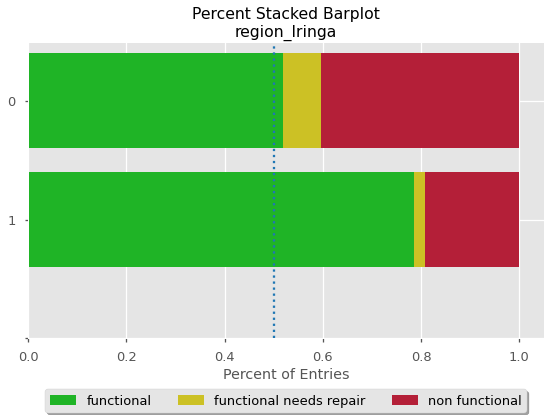

In [97]:
# Example of top geographical column.
preliminary_eda(X_train_filtered, 'region_Iringa', as_cat=True,
                interact_with_series=y_train)

You can see clearly the difference in distribution of functional water pumps based on whether or not a pump belongs to the region Iringa.

### `funder` Column
Similarly to the geographical columns which were too numerous to include, there are way too many unique categories for `funder`.

In [98]:
# In order to properly look at this column, 
# we need to impute the missing data first.
X_train_filtered['funder'] = X_train_filtered['funder'].fillna('missing')
X_test_filtered['funder'] = X_test_filtered['funder'].fillna('missing')
unlabeled_y['funder'] = unlabeled_y['funder'].fillna('missing')

In [99]:
# We want to first consolidate this column from the rarest entries.
# Otherwise, we may have some misleading feature-importances.
funder_count = X_train_filtered['funder'].value_counts(normalize=True,
                                                       dropna=False).copy()
funder_count

Government Of Tanzania    0.153625
missing                   0.061279
Danida                    0.052458
Hesawa                    0.037621
Rwssp                     0.023547
                            ...   
Kkkt Usa                  0.000022
Tdrs                      0.000022
Teonas Wambura            0.000022
Zingibali Secondary       0.000022
Poland Sec School         0.000022
Name: funder, Length: 1665, dtype: float64

Since there are a massive amount of rare entries in this column, I will change their value to `rare` if they are present in less than 0.5 % of entries.

In [100]:
good_funder_entries = list(funder_count[funder_count >= 0.005].index)
good_funder_entries

['Government Of Tanzania',
 'missing',
 'Danida',
 'Hesawa',
 'Rwssp',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Unicef',
 'Tasaf',
 'Private Individual',
 'Dhv',
 'District Council',
 'Dwsp',
 '0',
 'Norad',
 'Tcrs',
 'Germany Republi',
 'Ministry Of Water',
 'Water',
 'Dwe',
 'Netherlands',
 'Adb',
 'Hifab',
 'Lga',
 'Amref',
 'Fini Water',
 'Oxfam',
 'Wateraid',
 'Rc Church',
 'Rudep',
 'Isf',
 'Private',
 'Mission']

In [101]:
# Percent to be labeled as 'rare'.
sum(funder_count[funder_count < 0.005])

0.361503928170574

In [102]:
# Set the column to a manually imputed list.
X_train_filtered['funder'] = [x if x in good_funder_entries else 'rare'
                              for x in X_train_filtered['funder']]
X_test_filtered['funder'] = [x if x in good_funder_entries else 'rare'
                             for x in X_test_filtered['funder']]
unlabeled_y['funder'] = [x if x in good_funder_entries else 'rare'
                         for x in unlabeled_y['funder']]

X_train_filtered['funder'].value_counts()

rare                      16105
Government Of Tanzania     6844
missing                    2730
Danida                     2337
Hesawa                     1676
Rwssp                      1049
World Bank                 1033
Kkkt                        980
World Vision                922
Unicef                      794
Tasaf                       664
Private Individual          628
Dhv                         617
District Council            616
Dwsp                        591
0                           579
Norad                       565
Tcrs                        459
Germany Republi             456
Ministry Of Water           441
Water                       430
Dwe                         363
Netherlands                 361
Adb                         349
Hifab                       340
Lga                         325
Amref                       316
Fini Water                  281
Oxfam                       271
Wateraid                    254
Rc Church                   251
Rudep   

Training on dataframe shape: ((44550, 35))


Label                  Timestamp  Elapsed Time (sec)
0  Start 2020-10-02 09:53:25.236697            0.000000
1   Stop 2020-10-02 09:53:25.356418            0.119721

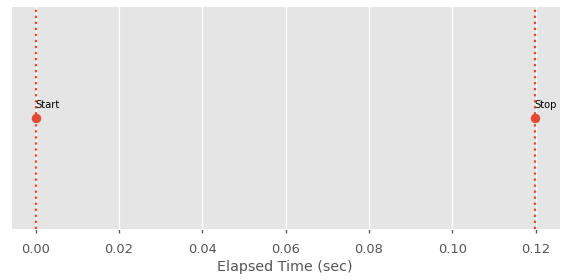

index  importance
0  funder_Government Of Tanzania    0.235247
1              funder_Fini Water    0.109481
2       funder_Ministry Of Water    0.064776
3      funder_Private Individual    0.058914
4         funder_Germany Republi    0.058395

In [103]:
# Still with 35 entries, I'm going to select the most important 25 predictors.
top_25_funder = top_features_decision_tree(X_train_filtered, y_train,
                                           ['funder'],
                                           top_n=25)
top_25_funder.head()

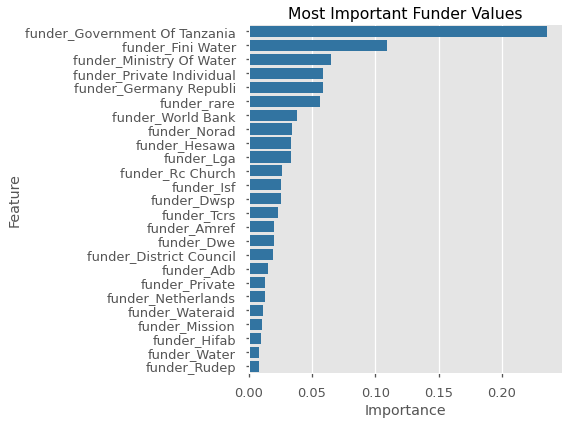

In [104]:
# Plot importances.
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='importance', y='index', orient='h', 
            data=top_25_funder, ax=ax, color=COLOR)
ax.set(title='Most Important Funder Values', 
       xlabel='Importance', 
       ylabel='Feature')

fig.tight_layout()

In [105]:
top_25_funder['index'].values

array(['funder_Government Of Tanzania', 'funder_Fini Water',
       'funder_Ministry Of Water', 'funder_Private Individual',
       'funder_Germany Republi', 'funder_rare', 'funder_World Bank',
       'funder_Norad', 'funder_Hesawa', 'funder_Lga', 'funder_Rc Church',
       'funder_Isf', 'funder_Dwsp', 'funder_Tcrs', 'funder_Amref',
       'funder_Dwe', 'funder_District Council', 'funder_Adb',
       'funder_Private', 'funder_Netherlands', 'funder_Wateraid',
       'funder_Mission', 'funder_Hifab', 'funder_Water', 'funder_Rudep'],
      dtype=object)

In [106]:
# Manually OHE these columns and drop the ones that are least-predictive.
for v in list(top_25_funder['index'].values):
    v = v.split('_')[1]
    X_train_filtered[f'funder_{v}'] = (
        X_train_filtered['funder'] == v).astype(int)
    X_test_filtered[f'funder_{v}'] = (
        X_test_filtered['funder'] == v).astype(int)
    unlabeled_y[f'funder_{v}'] = (
        unlabeled_y['funder'] == v).astype(int)
    
X_train_filtered.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type_group', 'management',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'waterpoint_type_group', 'years_old',
       'tsh_exists', 'altitude_cat', 'installed_by_DWE',
       'basin_Ruvuma / Southern Coast', 'subvillage_Majengo',
       'subvillage_Shuleni', 'subvillage_Madukani', 'subvillage_Mtakuja',
       'subvillage_Kati', 'region_Iringa', 'region_Arusha', 'region_Tabora',
       'region_Tanga', 'region_code_10', 'region_code_15', 'region_code_2',
       'district_code_4', 'district_code_3', 'lga_Bariadi', 'lga_Siha',
       'lga_Kigoma Rural', 'lga_Hai', 'lga_Bagamoyo', 'lga_Pangani',
       'lga_Babati', 'lga_Lindi Rural', 'lga_Kasulu', 'lga_Bunda',
       'funder

In [107]:
# Drop unwanted parent column.
X_train_filtered.drop('funder', axis=1, inplace=True)
X_test_filtered.drop('funder', axis=1, inplace=True)
unlabeled_y.drop('funder', axis=1, inplace=True)

In [108]:
X_train_filtered.shape, X_test_filtered.shape

((44550, 78), (14850, 78))

In [109]:
unlabeled_y.shape

(14850, 78)

In [110]:
TO_DO_NOTES.remove('Impute `funder` col for NaN: `missing`')

********************************************************************************
*                    funder_Government Of Tanzania Analysis                    *
********************************************************************************


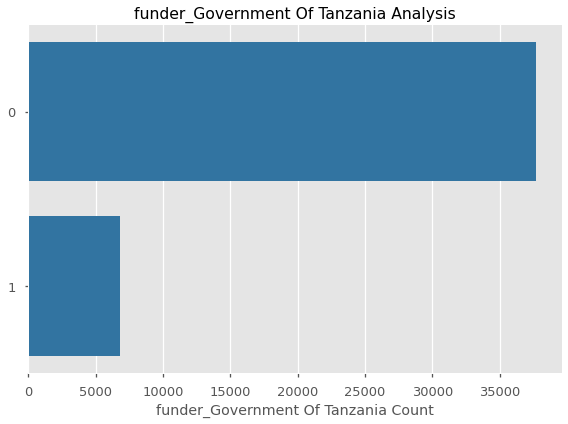


funder_Government Of Tanzania - Value Counts:
---------------------------------------------


0    37706
1     6844
Name: funder_Government Of Tanzania, dtype: int64


funder_Government Of Tanzania - Unique Values
---------------------------------------------
2 unique values (out of 44550).

funder_Government Of Tanzania - NaN:
------------------------------------
0.0%
(0/44550)


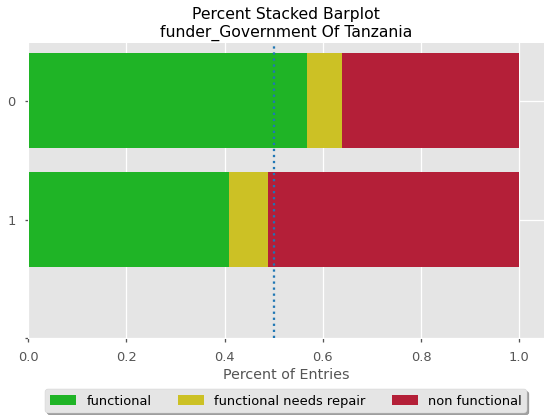

In [111]:
# Example.
preliminary_eda(X_train_filtered, 'funder_Government Of Tanzania', as_cat=True,
                interact_with_series=y_train)

Over half of pumps funded by the Government of Tanzania are non-functional.

## Notes

In [112]:
# region_code and district_code were both 
# used in the geographical feature-selection.
geo_notes = ['Transform region_code to categorical.',
             'Transform district_code to categorical.']
for n in geo_notes:
    TO_DO_NOTES.remove(n)

TO_DO_NOTES

['Impute `public_meeting` NaN values with `missing`.',
 'Impute `scheme_management` NaN to `missing`',
 'Impute `permit` NaN to `missing`.']

In [113]:
# Set these columns to strings for OHE.
X_train_filtered['public_meeting'] = X_train_filtered[
    'public_meeting'].map({True: 'True', False: 'False'})

X_test_filtered['public_meeting'] = X_test_filtered[
    'public_meeting'].map({True: 'True', False: 'False'})

unlabeled_y['public_meeting'] = unlabeled_y[
    'public_meeting'].map({True: 'True', False: 'False'})

Double-check the following can be one-hot-encoded.

In [114]:
X_train_filtered['public_meeting'].value_counts(dropna=False)

True     38243
False     3796
NaN       2511
Name: public_meeting, dtype: int64

In [115]:
X_train_filtered['scheme_management']

32249                 WUG
58381                 VWC
16126                 VWC
18554                 WUA
12942                 VWC
               ...       
28312                 VWC
7894                  VWC
30708    Private operator
15289                 VWC
42013         Water Board
Name: scheme_management, Length: 44550, dtype: object

This can be imputed in the Pipeline.

In [116]:
# Set these columns to strings for OHE.
X_train_filtered['permit'] = X_train_filtered['permit'].map(
    {True: 'True', False: 'False'})

X_test_filtered['permit'] = X_test_filtered['permit'].map(
    {True: 'True', False: 'False'})

unlabeled_y['permit'] = unlabeled_y['permit'].map(
    {True: 'True', False: 'False'})

In [117]:
X_train_filtered['permit'].value_counts(dropna=False)

True     29124
False    13117
NaN       2309
Name: permit, dtype: int64

## Drops

In [118]:
COLS_TO_DROP

['id', 'date_recorded', 'installer', 'wpt_name', 'recorded_by', 'scheme_name']

In [119]:
# Rescue id column for competitoin purposes.
UNLABELED_ROW_IDS = unlabeled_y['id'].values

In [120]:
unlabeled_y.head()

id  amount_tsh date_recorded  gps_height   installer  longitude  \
0  50785         0.0    2013-02-04        1996        DMDD  35.290799   
1  51630         0.0    2013-02-04        1569         DWE  36.656709   
2  17168         0.0    2013-02-01        1567         NaN  34.767863   
3  45559         0.0    2013-01-22         267  FINN WATER  38.058046   
4  49871       500.0    2013-03-27        1260      BRUDER  35.006123   

    latitude                 wpt_name  num_private  population public_meeting  \
0  -4.059696  Dinamu Secondary School            0         321           True   
1  -3.309214                  Kimnyak            0         300           True   
2  -5.004344           Puma Secondary            0         500           True   
3  -9.418672           Kwa Mzee Pange            0         250            NaN   
4 -10.950412          Kwa Mzee Turuka            0          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

  extraction_type_group   management management_group payment_type  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group      monthly   

  water_quality      quantity                source     waterpoint_type  \
0          soft      seasonal  rainwater harvesting               other   
1          soft  insufficient                spring  communal standpipe   
2          soft  insufficient  rainwater harvesting               other   
3          soft           dry          shallow well               other   
4          soft        enough                spring  communal standpipe   

  waterpoint_type_group  years_old  tsh_exists   altitude_cat  \
0                 other          8           0  high_altitude   
1    communal standpipe         20           0  high_altitude   
2                 other         10           0  high_altitude   
3                 other         33           0   med_altitude   
4    communal standpipe         20           1  high_altitude   

   installed_by_DWE  basin_Ruvuma / Southern Coast  subvillage_Majengo  \
0                 0                              0                   0   
1                 1                              0                   0   
2                 0                              0                   0   
3                 0                              1                   0   
4                 0                              1                   0   

   subvillage_Shuleni  subvillage_Madukani  subvillage_Mtakuja  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   subvillage_Kati  region_Iringa  region_Arusha  region_Tabora  region_Tanga  \
0                0              0              0              0             0   
1                0              0              1              0             0   
2                0              0              0              0             0   
3                0              0              0              0             0   
4                0              0              0              0             0   

   region_code_10  region_code_15  region_code_2  district_co

In [121]:
if 'id' in X_train_filtered.columns:
    X_train_filtered.drop(columns=COLS_TO_DROP, inplace=True)
    X_test_filtered.drop(columns=COLS_TO_DROP, inplace=True)
    unlabeled_y.drop(columns=COLS_TO_DROP, inplace=True)

In [122]:
X_train_filtered.shape, X_test_filtered.shape

((44550, 72), (14850, 72))

In [123]:
unlabeled_y.shape

(14850, 72)

# Missing Values

In [124]:
X_train_filtered.head()

amount_tsh  gps_height  longitude   latitude  num_private  population  \
32249         0.0           0  34.066645  -3.179319            0           0   
58381        10.0         214  38.926421  -7.092753            0           1   
16126         0.0           0  33.073676  -9.421432            0           0   
18554       500.0        1852  34.743514  -9.164110            0         250   
12942       600.0         542  37.240177 -10.951590            0           1   

      public_meeting scheme_management permit extraction_type_group  \
32249           True               WUG  False                swn 80   
58381           True               VWC   True        india mark iii   
16126           True               VWC  False               gravity   
18554           True               WUA   True               gravity   
12942           True               VWC  False               gravity   

      management management_group payment_type water_quality  quantity  \
32249        wug       user-group        other          soft    enough   
58381        vwc       user-group   per bucket         salty   unknown   
16126        vwc       user-group      unknown          soft  seasonal   
18554        wua       user-group      monthly          soft    enough   
12942        vwc       user-group     annually          soft    enough   

             source     waterpoint_type waterpoint_type_group  years_old  \
32249  shallow well           hand pump             hand pump         -1   
58381   machine dbh           hand pump             hand pump         16   
16126        spring  communal standpipe    communal standpipe         -1   
18554        spring  communal standpipe    communal standpipe         11   
12942         river  communal standpipe    communal standpipe         28   

       tsh_exists   altitude_cat  installed_by_DWE  \
32249           0   low_altitude                 1   
58381           1   med_altitude                 0   
16126           0   low_altitude                 0   
18554           1  high_altitude                 0   
12942           1   med_altitude                 0   

       basin_Ruvuma / Southern Coast  subvillage_Majengo  subvillage_Shuleni  \
32249                              0                   0                   0   
58381                              0                   0                   0   
16126                              0                   0                   0   
18554                              0                   0                   1   
12942                              1                   0                   0   

       subvillage_Madukani  subvillage_Mtakuja  subvillage_Kati  \
32249                    0                   0                0   
58381                    0                   0                0   
16126                    0                   0                0   
18554                    0                   0                0   
12942                    0                   0                0   

       region_Iringa  region_Arusha  region_Tabora  region_Tanga  \
32249              0              0              0             0   
58381              0              0              0             0   
16126              0              0              0             0   
18554              1              0              0             0   
12942              0              0              0             0   

       region_code_10  region_code_15  region_code_2  district_code_4  \
32249               0               0              0                0   
58381               0               0              0                0   
16126               0               0              0                0   
18554               0               0              0                1   
12942               1               0              0                0   

       district_code_3  lga_Bariadi  lga_Siha  lga_Kigoma Rural  lga_Hai  \
32249                0            0         0                 0 

In [125]:
na = X_train_filtered.isna().sum()
any_na = na[na > 0]
any_na

public_meeting       2511
scheme_management    2918
permit               2309
dtype: int64

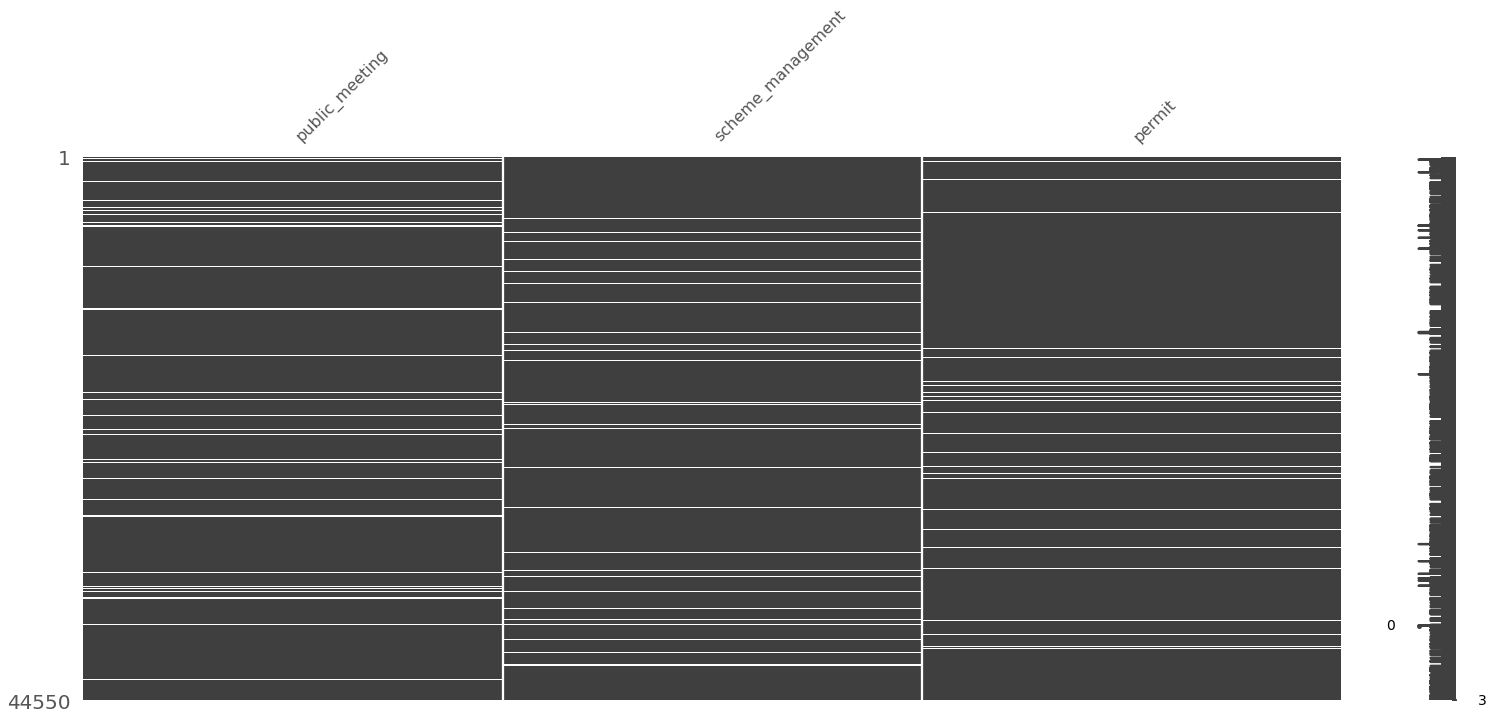

In [126]:
missingno.matrix(X_train_filtered[any_na.index]);

# Preprocessing with Pipeline

## Numeric

In [127]:
numeric_cols = list(X_train_filtered.select_dtypes('number').columns)
numeric_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'years_old',
 'tsh_exists',
 'installed_by_DWE',
 'basin_Ruvuma / Southern Coast',
 'subvillage_Majengo',
 'subvillage_Shuleni',
 'subvillage_Madukani',
 'subvillage_Mtakuja',
 'subvillage_Kati',
 'region_Iringa',
 'region_Arusha',
 'region_Tabora',
 'region_Tanga',
 'region_code_10',
 'region_code_15',
 'region_code_2',
 'district_code_4',
 'district_code_3',
 'lga_Bariadi',
 'lga_Siha',
 'lga_Kigoma Rural',
 'lga_Hai',
 'lga_Bagamoyo',
 'lga_Pangani',
 'lga_Babati',
 'lga_Lindi Rural',
 'lga_Kasulu',
 'lga_Bunda',
 'funder_Government Of Tanzania',
 'funder_Fini Water',
 'funder_Ministry Of Water',
 'funder_Private Individual',
 'funder_Germany Republi',
 'funder_rare',
 'funder_World Bank',
 'funder_Norad',
 'funder_Hesawa',
 'funder_Lga',
 'funder_Rc Church',
 'funder_Isf',
 'funder_Dwsp',
 'funder_Tcrs',
 'funder_Amref',
 'funder_Dwe',
 'funder_District Council',
 'funder_Adb',
 'funder_Private

In [128]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

with config_context(display='diagram'):
    display(num_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

## Categorical

In [129]:
categorical_cols = list(X_train_filtered.select_dtypes('object').columns)
categorical_cols

['public_meeting',
 'scheme_management',
 'permit',
 'extraction_type_group',
 'management',
 'management_group',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'waterpoint_type_group',
 'altitude_cat']

In [130]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', 
                              fill_value='missing')),
    ('encoder', OneHotEncoder(sparse=False, 
                              handle_unknown='ignore'))
])

with config_context(display='diagram'):
    display(cat_transformer)

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Column Transformer
Combining the above pipelines.

In [131]:
preprocessing = ColumnTransformer([
    ('numeric', num_transformer, numeric_cols),
    ('categorical', cat_transformer, categorical_cols)
])

with config_context(display='diagram'):
    display(preprocessing)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'population',
                                  'years_old', 'tsh_exists', 'installed_by_DWE',
                                  'basin_Ruvuma / Southern Coast',
                                  'subvillage_Majengo', 'subvillage_Shuleni',
                                  'subvillage_Madukani', 'su...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['public_meeting', 'scheme_management',
                                  'permit', 'extraction_type_group',
                                  'management', 'management_group',
                                  'payment_type', 'water_quality', 'quantity',
                                  'source', 'waterpoint_type',
                                  'waterpoint_type_group', 'altitude_cat'])])

In [132]:
# Fit / fit_transform the data.
X_train_processed = preprocessing.fit_transform(X_train_filtered)
X_test_processed = preprocessing.transform(X_test_filtered)
unlabeled_y_processed = preprocessing.transform(unlabeled_y)

X_train_processed.shape, X_test_processed.shape

((44550, 153), (14850, 153))

In [133]:
unlabeled_y_processed.shape

(14850, 153)

### Naming Features

In [134]:
# Get column names for reconstruction of DataFrame.
num_f_names = numeric_cols
cat_f_names = list(preprocessing.named_transformers_[
    'categorical'].named_steps['encoder'].get_feature_names(categorical_cols))

f_names = num_f_names + cat_f_names
f_names[:10]

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'years_old',
 'tsh_exists',
 'installed_by_DWE',
 'basin_Ruvuma / Southern Coast']

In [135]:
# Reconstruct df.
X_train_df = pd.DataFrame(X_train_processed, columns=f_names)
X_test_df = pd.DataFrame(X_test_processed, columns=f_names)
unlabeled_y_df = pd.DataFrame(unlabeled_y_processed, columns=f_names)

X_train_df.shape, X_test_df.shape

((44550, 153), (14850, 153))

In [136]:
unlabeled_y_df.shape

(14850, 153)

In [137]:
X_train_df.head()

amount_tsh  gps_height  longitude  latitude  num_private  population  \
0   -0.131809   -0.962904   0.000593  0.855579    -0.052648   -0.377062   
1   -0.127428   -0.654096   0.739011 -0.473713    -0.052648   -0.374966   
2   -0.131809   -0.962904  -0.150284 -1.264705    -0.052648   -0.377062   
3    0.087249    1.709585   0.103440 -1.177299    -0.052648    0.147166   
4    0.131061   -0.180783   0.482795 -1.784460    -0.052648   -0.374966   

   years_old  tsh_exists  installed_by_DWE  basin_Ruvuma / Southern Coast  \
0  -1.027208   -0.651262          1.552125                      -0.284459   
1   0.082748    1.535481         -0.644278                      -0.284459   
2  -1.027208   -0.651262         -0.644278                      -0.284459   
3  -0.243710    1.535481         -0.644278                      -0.284459   
4   0.866247    1.535481         -0.644278                       3.515440   

   subvillage_Majengo  subvillage_Shuleni  subvillage_Madukani  \
0           -0.093367           -0.093976            -0.091763   
1           -0.093367           -0.093976            -0.091763   
2           -0.093367           -0.093976            -0.091763   
3           -0.093367           10.640995            -0.091763   
4           -0.093367           -0.093976            -0.091763   

   subvillage_Mtakuja  subvillage_Kati  region_Iringa  region_Arusha  \
0           -0.066646        -0.081784      -0.312521      -0.245016   
1           -0.066646        -0.081784      -0.312521      -0.245016   
2           -0.066646        -0.081784      -0.312521      -0.245016   
3           -0.066646        -0.081784       3.199789      -0.245016   
4           -0.066646        -0.081784      -0.312521      -0.245016   

   region_Tabora  region_Tanga  region_code_10  region_code_15  region_code_2  \
0      -0.184202     -0.213146       -0.216121        -0.17772      -0.231979   
1      -0.184202     -0.213146       -0.216121        -0.17772      -0.231979   
2      -0.184202     -0.213146       -0.216121        -0.17772      -0.231979   
3      -0.184202     -0.213146       -0.216121        -0.17772      -0.231979   
4      -0.184202     -0.213146        4.627035        -0.17772      -0.231979   

   district_code_4  district_code_3  lga_Bariadi  lga_Siha  lga_Kigoma Rural  \
0        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   
1        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   
2        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   
3         2.381420        -0.449777     -0.14179 -0.085459         -0.118118   
4        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   

    lga_Hai  lga_Bagamoyo  lga_Pangani  lga_Babati  lga_Lindi Rural  \
0 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
1 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
2 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
3 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
4 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   

   lga_Kasulu  lga_Bunda  funder_Government Of Tanzania  funder_Fini Water  \
0   -0.133841  -0.083709                      -0.426039          -0.079672   
1   -0.133841  -0.083709                      -0.426039          -0.079672   
2   -0.133841  -0.083709                      -0.426039          -0.079672   
3   -0.133841  -0.083709                      -0.426039          -0.079672   
4   -0.133841  -0.083709                      -0.426039          -0.079672   

   funder_Ministry Of Water  funder_Private Individual  \
0                  -0.09999                  -0.119575   
1                  -0.09999                  -0.119575   
2                  -0.09999                  -0.119575   
3                  -0.09999                  -0.119575   
4                  -0.09999                  -0.119575   

   funder_Germany Republi  funder_rare  funder

In [138]:
X_test_df.head()

amount_tsh  gps_height  longitude  latitude  num_private  population  \
0   -0.131809    1.816369  -0.408933 -0.710158    -0.052648   -0.374966   
1    0.087249    1.395005   0.060233 -1.403059    -0.052648   -0.278508   
2   -0.131809   -0.962904  -0.140756  1.061820    -0.052648   -0.377062   
3   -0.131809   -0.962904  -0.226846  0.764516    -0.052648   -0.377062   
4   -0.131809   -0.962904  -0.060787 -1.120049    -0.052648   -0.377062   

   years_old  tsh_exists  installed_by_DWE  basin_Ruvuma / Southern Coast  \
0   1.388579   -0.651262         -0.644278                      -0.284459   
1   0.670372    1.535481         -0.644278                      -0.284459   
2  -1.027208   -0.651262         -0.644278                      -0.284459   
3  -1.027208   -0.651262          1.552125                      -0.284459   
4  -1.027208   -0.651262         -0.644278                      -0.284459   

   subvillage_Majengo  subvillage_Shuleni  subvillage_Madukani  \
0           -0.093367           -0.093976            -0.091763   
1           -0.093367           -0.093976            -0.091763   
2           -0.093367           -0.093976            -0.091763   
3           -0.093367           -0.093976            -0.091763   
4           -0.093367           -0.093976            -0.091763   

   subvillage_Mtakuja  subvillage_Kati  region_Iringa  region_Arusha  \
0           -0.066646        -0.081784      -0.312521      -0.245016   
1           -0.066646        -0.081784       3.199789      -0.245016   
2           -0.066646        -0.081784      -0.312521      -0.245016   
3           -0.066646        -0.081784      -0.312521      -0.245016   
4           -0.066646        -0.081784      -0.312521      -0.245016   

   region_Tabora  region_Tanga  region_code_10  region_code_15  region_code_2  \
0      -0.184202     -0.213146       -0.216121        5.626837      -0.231979   
1      -0.184202     -0.213146       -0.216121       -0.177720      -0.231979   
2      -0.184202     -0.213146       -0.216121       -0.177720      -0.231979   
3      -0.184202     -0.213146       -0.216121       -0.177720      -0.231979   
4      -0.184202     -0.213146       -0.216121       -0.177720      -0.231979   

   district_code_4  district_code_3  lga_Bariadi  lga_Siha  lga_Kigoma Rural  \
0        -0.419918         2.223324     -0.14179 -0.085459         -0.118118   
1        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   
2        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   
3        -0.419918         2.223324     -0.14179 -0.085459         -0.118118   
4        -0.419918        -0.449777     -0.14179 -0.085459         -0.118118   

    lga_Hai  lga_Bagamoyo  lga_Pangani  lga_Babati  lga_Lindi Rural  \
0 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
1 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
2 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
3 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   
4 -0.103148     -0.131299     -0.07421   -0.092259         -0.08024   

   lga_Kasulu  lga_Bunda  funder_Government Of Tanzania  funder_Fini Water  \
0   -0.133841  -0.083709                      -0.426039          -0.079672   
1   -0.133841  -0.083709                      -0.426039          -0.079672   
2   -0.133841  -0.083709                      -0.426039          -0.079672   
3   -0.133841  -0.083709                      -0.426039          -0.079672   
4   -0.133841  -0.083709                      -0.426039          -0.079672   

   funder_Ministry Of Water  funder_Private Individual  \
0                  -0.09999                  -0.119575   
1                  -0.09999                  -0.119575   
2                  -0.09999                  -0.119575   
3                  -0.09999                  -0.119575   
4                  -0.09999                  -0.119575   

   funder_Germany Republi  funder_rare  funder

In [139]:
X_train_df.shape, X_test_df.shape, y_train.shape, y_test.shape

((44550, 153), (14850, 153), (44550,), (14850,))

## Feature Selecting: Identify Constant and Correlated Columns

### Constant Columns

In [140]:
(X_train_df.describe().loc['std'] == 0).any()

False

### Correlated

In [141]:
# Find which feature pairs have a high correlation coefficient.
corr_df = X_train_df.corr().abs().stack().reset_index()
corr_df.columns = ['feat1', 'feat2', 'correlation_coef']
corr_df = corr_df[
    (corr_df['correlation_coef'] > 0.75) & (corr_df['correlation_coef'] < 1.0)]

display(corr_df.shape)
corr_df.head()

(38, 3)

feat1                       feat2  correlation_coef
303      gps_height  altitude_cat_high_altitude          0.925433
304      gps_height   altitude_cat_low_altitude          0.799247
2469  region_Arusha               region_code_2          0.946792
3229  region_code_2               region_Arusha          0.946792
4169        lga_Hai      funder_Germany Republi          0.981528

#### Finding groups of correlated features.

> **The plan**:
- Iterate through each unique feature from the `feat1` column above.
- Find all rows where that feature appears.
- Use these rows to get a list of features (`feat2`) that are highly correlated with the given feature.
- Append all of these features to a list to be sure not to get redundant groups of features.

Each group of correlated features will be a dataframe from the above list.

In [142]:
# Find groups of correlated features.
already_checked = []
grouped_corr_features = []

for feature in corr_df['feat1'].unique():
    if feature in already_checked:
        continue
    all_corr = corr_df[corr_df['feat1'] == feature]
    corr_with = list(all_corr['feat2'].unique())
    already_checked += [feature] + corr_with
    
    grouped_corr_features.append(all_corr)

print(f'{len(grouped_corr_features)} groups of correlated features found.\n')
print('Examples:')
for each in grouped_corr_features[:2]:
    display(each)

16 groups of correlated features found.

Examples:


feat1                       feat2  correlation_coef
303  gps_height  altitude_cat_high_altitude          0.925433
304  gps_height   altitude_cat_low_altitude          0.799247

feat1          feat2  correlation_coef
2469  region_Arusha  region_code_2          0.946792

Now that we have these groups or correlated features, we want to find out which ones to keep. Keeping all of these features can confuse the importance of certain features when modeling.
> **The plan**:
- Use a Decision Tree Classifier for each group of correlated features to pick the most important one.
- Show all groups of features and their respective importances.

Examples:


feature  importance
2                  gps_height    0.999824
0  altitude_cat_high_altitude    0.000161
1   altitude_cat_low_altitude    0.000016

feature  importance
1  region_Arusha    0.712342
0  region_code_2    0.287658

Label                  Timestamp  Elapsed Time (sec)
0   Start 2020-10-02 09:54:03.179274            0.000000
1    Lap1 2020-10-02 09:54:03.263061            0.083787
2    Lap2 2020-10-02 09:54:03.310516            0.131242
3    Lap3 2020-10-02 09:54:03.357225            0.177951
4    Lap4 2020-10-02 09:54:03.402446            0.223172
5    Lap5 2020-10-02 09:54:03.450760            0.271486
6    Lap6 2020-10-02 09:54:03.497360            0.318086
7    Lap7 2020-10-02 09:54:03.546645            0.367371
8    Lap8 2020-10-02 09:54:03.589529            0.410255
9    Lap9 2020-10-02 09:54:03.633274            0.454000
10  Lap10 2020-10-02 09:54:03.677752            0.498478
11  Lap11 2020-10-02 09:54:03.732646            0.553372
12  Lap12 2020-10-02 09:54:03.782316            0.603042
13  Lap13 2020-10-02 09:54:03.829701            0.650427
14  Lap14 2020-10-02 09:54:03.880368            0.701094
15  Lap15 2020-10-02 09:54:03.927747            0.748473
16  Lap16 2020-10-02 09:54:03.980145            0.800871

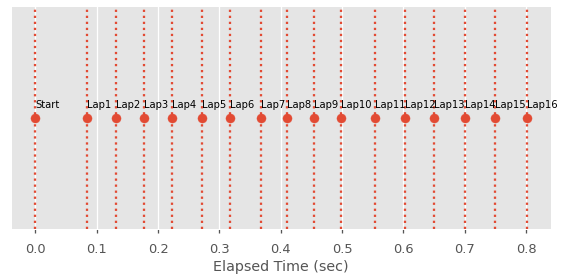

In [143]:
# Get master-lists of features that are correlated with each other.
features_in_groups = [list(grouped_corr_features[i]['feat2'].unique()) + \
                      list(grouped_corr_features[i]['feat1'].unique())
                      for i in range(len(grouped_corr_features))]

# Initiate list for feature_importance dataframes.
feature_importance_df_lst = []

watch = Stopwatch()

# Iterate over each group.
# Create a dataframe of feature importance.
for n, feature_lst in enumerate(features_in_groups):
    tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
    tree.fit(X_train_df[feature_lst], y_train)
    
    # Create the df.
    df = pd.concat(
        [pd.Series(feature_lst), 
         pd.Series(tree.feature_importances_)], 
        axis=1)
    df.columns = ['feature', 'importance']
    
    # Append to the master list.
    feature_importance_df_lst.append(df)
    watch.lap()
    
# Show examples of feature-importance dfs.
print('Examples:')
for df in feature_importance_df_lst[:2]:
    display(df.sort_values('importance', ascending=False))
watch.display_laps()

In [144]:
# Select the top feature in each feature group.
features_to_keep = [df.iloc[df['importance'].argmax()]['feature'] 
                    for df in feature_importance_df_lst]
features_to_drop = list(set(already_checked) - set(features_to_keep))
features_to_drop

['management_other',
 'altitude_cat_high_altitude',
 'region_code_2',
 'public_meeting_False',
 'management_trust',
 'scheme_management_WUG',
 'waterpoint_type_group_communal standpipe',
 'management_wua',
 'permit_True',
 'scheme_management_Parastatal',
 'scheme_management_VWC',
 'management_parastatal',
 'scheme_management_Company',
 'altitude_cat_low_altitude',
 'lga_Hai',
 'management_other - school']

#### Drop correlated columns.

In [145]:
X_train_df.drop(columns=features_to_drop, inplace=True)
X_test_df.drop(columns=features_to_drop, inplace=True)
unlabeled_y_df.drop(columns=features_to_drop, inplace=True)

X_train_df.shape, X_test_df.shape

((44550, 137), (14850, 137))

# Dump `num_feature_names` & `cat_feature_names`

In [146]:
# Save the column names for modeling notebook.
num_feature_names = [c for c in num_f_names if c in X_train_df.columns]
cat_feature_names = [c for c in cat_f_names if c in X_train_df.columns]

dump(num_feature_names, 'processed_data/num_feature_names.jobjib')
dump(cat_feature_names, 'processed_data/cat_feature_names.jobjib')

['processed_data/cat_feature_names.jobjib']

# Encoding Target

In [147]:
# Label encode the target variable to [0, 1, 2].
label_enc = LabelEncoder()

y_train_enc = pd.Series(label_enc.fit_transform(y_train), 
                        name='status_group')
y_test_enc = pd.Series(label_enc.transform(y_test), 
                       name='status_group')

In [148]:
X_train_df.shape, X_test_df.shape, y_train_enc.shape, y_test_enc.shape

((44550, 137), (14850, 137), (44550,), (14850,))

# Set `id` back for unlabeled data.

In [149]:
unlabeled_y_df['id'] = UNLABELED_ROW_IDS
unlabeled_y_df

amount_tsh  gps_height  longitude  latitude  num_private  population  \
0       -0.131809    1.917381   0.186597  0.556538    -0.052648    0.296047   
1       -0.131809    1.301208   0.394140  0.811457    -0.052648    0.252012   
2       -0.131809    1.298322   0.107139  0.235665    -0.052648    0.671394   
3       -0.131809   -0.577616   0.607066 -1.263768    -0.052648    0.147166   
4        0.087249    0.855312   0.143342 -1.784060    -0.052648   -0.251248   
...           ...         ...        ...       ...          ...         ...   
14845   -0.131809   -0.913841   0.727804 -0.300509    -0.052648   -0.335124   
14846    0.306308   -0.962904   0.514924  0.118110    -0.052648    5.829802   
14847   -0.131809    1.167006   0.102876  0.377906    -0.052648    0.042320   
14848   -0.131809    0.477238   0.208163 -1.659653    -0.052648   -0.062525   
14849   -0.131809   -0.268807   0.106713 -1.877674    -0.052648   -0.293186   

       years_old  tsh_exists  installed_by_DWE  basin_Ruvuma / Southern Coast  \
0      -0.439584   -0.651262         -0.644278                      -0.284459   
1       0.343914   -0.651262          1.552125                      -0.284459   
2      -0.309001   -0.651262         -0.644278                      -0.284459   
3       1.192704   -0.651262         -0.644278                       3.515440   
4       0.343914    1.535481         -0.644278                       3.515440   
...          ...         ...               ...                            ...   
14845   1.127413   -0.651262         -0.644278                      -0.284459   
14846   0.735664    1.535481         -0.644278                      -0.284459   
14847  -0.309001   -0.651262         -0.644278                      -0.284459   
14848  -0.243710   -0.651262          1.552125                      -0.284459   
14849  -0.178418   -0.651262         -0.644278                      -0.284459   

       subvillage_Majengo  subvillage_Shuleni  subvillage_Madukani  \
0               -0.093367           -0.093976            -0.091763   
1               -0.093367           -0.093976            -0.091763   
2               -0.093367           -0.093976            -0.091763   
3               -0.093367           -0.093976            -0.091763   
4               -0.093367           -0.093976            -0.091763   
...                   ...                 ...                  ...   
14845           -0.093367           -0.093976            -0.091763   
14846           -0.093367           -0.093976            -0.091763   
14847           -0.093367           -0.093976            -0.091763   
14848           -0.093367           -0.093976            -0.091763   
14849           -0.093367           -0.093976            -0.091763   

       subvillage_Mtakuja  subvillage_Kati  region_Iringa  region_Arusha  \
0               -0.066646        -0.081784      -0.312521      -0.245016   
1               -0.066646        -0.081784      -0.312521       4.081366   
2               -0.066646        -0.081784      -0.312521      -0.245016   
3               -0.066646        -0.081784      -0.312521      -0.245016   
4               -0.066646        -0.081784      -0.312521      -0.245016   
...                   ...              ...            ...            ...   
14845           -0.066646        -0.081784      -0.312521      -0.245016   
14846           -0.066646        -0.081784      -0.312521      -0.245016   
14847           -0.066646        -0.081784      -0.312521      -0.245016   
14848           -0.066646        -0.081784      -0.312521      -0.245016   
14849           -0.066646        -0.081784      -0.312521      -0.245016   

       region_Tabora  region_Tanga  region_code_10  region_code_15  \
0          -0.184202     -0.213146       -0.216121        -0.17772   
1          -0.184202     -0.213146       -0.216121        -0.17772   
2          -0.184202     -0.213146       -0.216121        -0.17772   
3          -0.184202     -0.213146       -0.216121 

# Writing Processed Data

In [150]:
df_dct = {
    'X_train_df': X_train_df,
    'X_test_df': X_test_df,
    'y_train_enc': y_train_enc,
    'y_test_enc': y_test_enc,
    'unlabeled_y_df': unlabeled_y_df
}

for name, df in df_dct.items():
    s = f'processed_data/{name}.csv'
    df.to_csv(s)
    print(s)

processed_data/X_train_df.csv
processed_data/X_test_df.csv
processed_data/y_train_enc.csv
processed_data/y_test_enc.csv
processed_data/unlabeled_y_df.csv


# Writing Preprocessing Pipeline / LabelEncoder

In [151]:
dump(preprocessing, 'dumps/preprocessing.jobjib')

['dumps/preprocessing.jobjib']

In [152]:
dump(label_enc, 'dumps/label_enc.jobjib')

['dumps/label_enc.jobjib']